In [2]:
import sys 
import os 
import glob
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.gridspec as gridspec
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from pylab import *
from matplotlib.ticker import NullFormatter, MultipleLocator, FormatStrFormatter, FuncFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
from gridData import Grid 
from io import StringIO
from collections import Counter
from scipy.stats import norm
from  scipy.stats import gaussian_kde
import seaborn as sns
#import statsmodels.api as sm
#from statsmodels.graphics.tsaplots import plot_acf
import math 
##Figure fonts and other params ##
##Figure fonts and other params ##
hfont = {'fontname':'Helvetica'}
mpl.rcParams['figure.dpi'] =300
mpl.rcParams.update({'font.size': 18})
mpl.rcParams['pdf.fonttype'] = 42 
plt.rc('font', family='Helvetica')
##

def rolling_window(a, window_size):
    shape = (a.shape[0] - window_size + 1, window_size) + a.shape[1:]
    strides = (a.strides[0],) + a.strides
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)


### BLOCK AVG --  ##

#(rm1[:,1])

def blockAverage(datastream, isplot=True, maxBlockSize=0):
 
	Nobs         = len(datastream)           # total number of observations in datastream
	minBlockSize = 1;                        # min: 1 observation/block
 
	if maxBlockSize == 0:
		maxBlockSize = int(Nobs/4);        # max: 4 blocs (otherwise can't calc variance)
  
	NumBlocks = maxBlockSize - minBlockSize   # total number of block sizes

	blockMean = np.zeros(NumBlocks)               # mean (expect to be "nearly" constant)
	blockVar  = np.zeros(NumBlocks)               # variance associated with each blockSize
	blockCtr  = 0
	
				#
				#  blockSize is # observations/block
				#  run them through all the neg2sibilities
				#
 
	for blockSize in range(minBlockSize, maxBlockSize):

		Nblock    = int(Nobs/blockSize)               # total number of such blocks in datastream
		obsProp   = np.zeros(Nblock)                  # container for parcelling block 
        
		# Loop to chop datastream into blocks
		# and take average
		for i in range(1,Nblock+1):
			
			ibeg = (i-1) * blockSize
			iend =  ibeg + blockSize
			obsProp[i-1] = np.mean(datastream[ibeg:iend])

		blockMean[blockCtr] = np.mean(obsProp)
		blockVar[blockCtr]  = np.var(obsProp)/(Nblock - 1)
		blockCtr += 1
 
	v = np.arange(minBlockSize,maxBlockSize)
	
	if isplot:
    
		plt.figure( figsize = (6,3)) 
		plt.subplot(1,2,1)
		plt.plot(v, np.sqrt(blockVar),'-',lw=1)
		plt.xlabel('block size')
		plt.ylabel('std')

		plt.subplot(1,2,2)
		plt.errorbar(v, blockMean, np.sqrt(blockVar))
		plt.ylabel('<x>')
		plt.xlabel('block size')

		print (blockMean[-1], np.sqrt(blockVar[-1]))
        
		plt.tight_layout()
		plt.show()
		
	#return v, blockVar, blockMean

In [5]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
#files

dist_neg =        '/mnt/large/prestin_2023/AA/results/distances_hsPres_neg0.2_1_11.dat'
occup_neg =       '/mnt/large/prestin_2023/AA/results/occup_hsPres_neg0.2_1_11.dat'
STASa_TMDb_neg =  '/mnt/large/prestin_2023/AA/results/STASa_TMDa_hsPres_neg0.2_1_11.dat'
STASb_TMDa_neg =  '/mnt/large/prestin_2023/AA/results/STASb_TMDb_hsPres_neg0.2_1_11.dat'
TMDa_STASb_neg =  '/mnt/large/prestin_2023/AA/results/TMDa_STASa_hsPres_neg0.2_1_11.dat'
TMDb_STASa_neg =  '/mnt/large/prestin_2023/AA/results/TMDb_STASb_hsPres_neg0.2_1_11.dat'
coreA_gateA_neg = '/mnt/large/prestin_2023/AA/results/coreA_gateA_hsPres_neg0.2_1_11.dat'
coreB_gateB_neg = '/mnt/large/prestin_2023/AA/results/coreB_gateB_hsPres_neg0.2_1_11.dat'
gateA_coreA_neg = '/mnt/large/prestin_2023/AA/results/gateA_coreA_hsPres_neg0.2_1_11.dat'
gateB_coreB_neg = '/mnt/large/prestin_2023/AA/results/gateB_coreB_hsPres_neg0.2_1_11.dat'

dist_neg2 =        '/mnt/large/prestin_2023/AA/results/distances_hsPres_plus0.2_1_26.dat'
occup_neg2 =       '/mnt/large/prestin_2023/AA/results/occup_hsPres_plus0.2_1_26.dat'
STASa_TMDb_neg2 =  '/mnt/large/prestin_2023/AA/results/STASa_TMDa_hsPres_plus0.2_1_26.dat'
STASb_TMDa_neg2 =  '/mnt/large/prestin_2023/AA/results/STASb_TMDb_hsPres_plus0.2_1_26.dat'
TMDa_STASb_neg2 =  '/mnt/large/prestin_2023/AA/results/TMDa_STASa_hsPres_plus0.2_1_26.dat'
TMDb_STASa_neg2 =  '/mnt/large/prestin_2023/AA/results/TMDb_STASb_hsPres_plus0.2_1_26.dat'
coreA_gateA_neg2 = '/mnt/large/prestin_2023/AA/results/coreA_gateA_hsPres_plus0.2_1_26.dat'
coreB_gateB_neg2 = '/mnt/large/prestin_2023/AA/results/coreB_gateB_hsPres_plus0.2_1_26.dat'
gateA_coreA_neg2 = '/mnt/large/prestin_2023/AA/results/gateA_coreA_hsPres_plus0.2_1_26.dat'
gateB_coreB_neg2 = '/mnt/large/prestin_2023/AA/results/gateB_coreB_hsPres_plus0.2_1_26.dat'

dist_plus =        '/mnt/large/prestin_2023/AA/results/distances_hsPres_real_plus0.2_1_26.dat'
occup_plus =       '/mnt/large/prestin_2023/AA/results/occup_hsPres_real_plus0.2_1_26.dat'
STASa_TMDb_plus =  '/mnt/large/prestin_2023/AA/results/STASa_TMDa_hsPres_real_plus0.2_1_26.dat'
STASb_TMDa_plus =  '/mnt/large/prestin_2023/AA/results/STASb_TMDb_hsPres_real_plus0.2_1_26.dat'
TMDa_STASb_plus =  '/mnt/large/prestin_2023/AA/results/TMDa_STASa_hsPres_real_plus0.2_1_26.dat'
TMDb_STASa_plus =  '/mnt/large/prestin_2023/AA/results/TMDb_STASb_hsPres_real_plus0.2_1_26.dat'
coreA_gateA_plus = '/mnt/large/prestin_2023/AA/results/coreA_gateA_hsPres_real_plus0.2_1_26.dat'
coreB_gateB_plus = '/mnt/large/prestin_2023/AA/results/coreB_gateB_hsPres_real_plus0.2_1_26.dat'
gateA_coreA_plus = '/mnt/large/prestin_2023/AA/results/gateA_coreA_hsPres_real_plus0.2_1_26.dat'
gateB_coreB_plus = '/mnt/large/prestin_2023/AA/results/gateB_coreB_hsPres_real_plus0.2_1_26.dat'


dist_eq =        '/mnt/large/prestin_2023/AA/results/distances_hsPres_0mv_1_18_20ps.dat'
occup_eq =       '/mnt/large/prestin_2023/AA/results/occup_hsPres_0mv_1_18_20ps.dat'
STASa_TMDb_eq =  '/mnt/large/prestin_2023/AA/results/STASa_TMDa_hsPres_0mv_1_18_20ps.dat'
STASb_TMDa_eq =  '/mnt/large/prestin_2023/AA/results/STASb_TMDb_hsPres_0mv_1_18_20ps.dat'
TMDa_STASb_eq =  '/mnt/large/prestin_2023/AA/results/TMDa_STASa_hsPres_0mv_1_18_20ps.dat'
TMDb_STASa_eq =  '/mnt/large/prestin_2023/AA/results/TMDb_STASb_hsPres_0mv_1_18_20ps.dat'
coreA_gateA_eq = '/mnt/large/prestin_2023/AA/results/coreA_gateA_hsPres_0mv_1_18_20ps.dat'
coreB_gateB_eq = '/mnt/large/prestin_2023/AA/results/coreB_gateB_hsPres_0mv_1_18_20ps.dat'
gateA_coreA_eq = '/mnt/large/prestin_2023/AA/results/gateA_coreA_hsPres_0mv_1_18_20ps.dat'
gateB_coreB_eq = '/mnt/large/prestin_2023/AA/results/gateB_coreB_hsPres_0mv_1_18_20ps.dat'


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


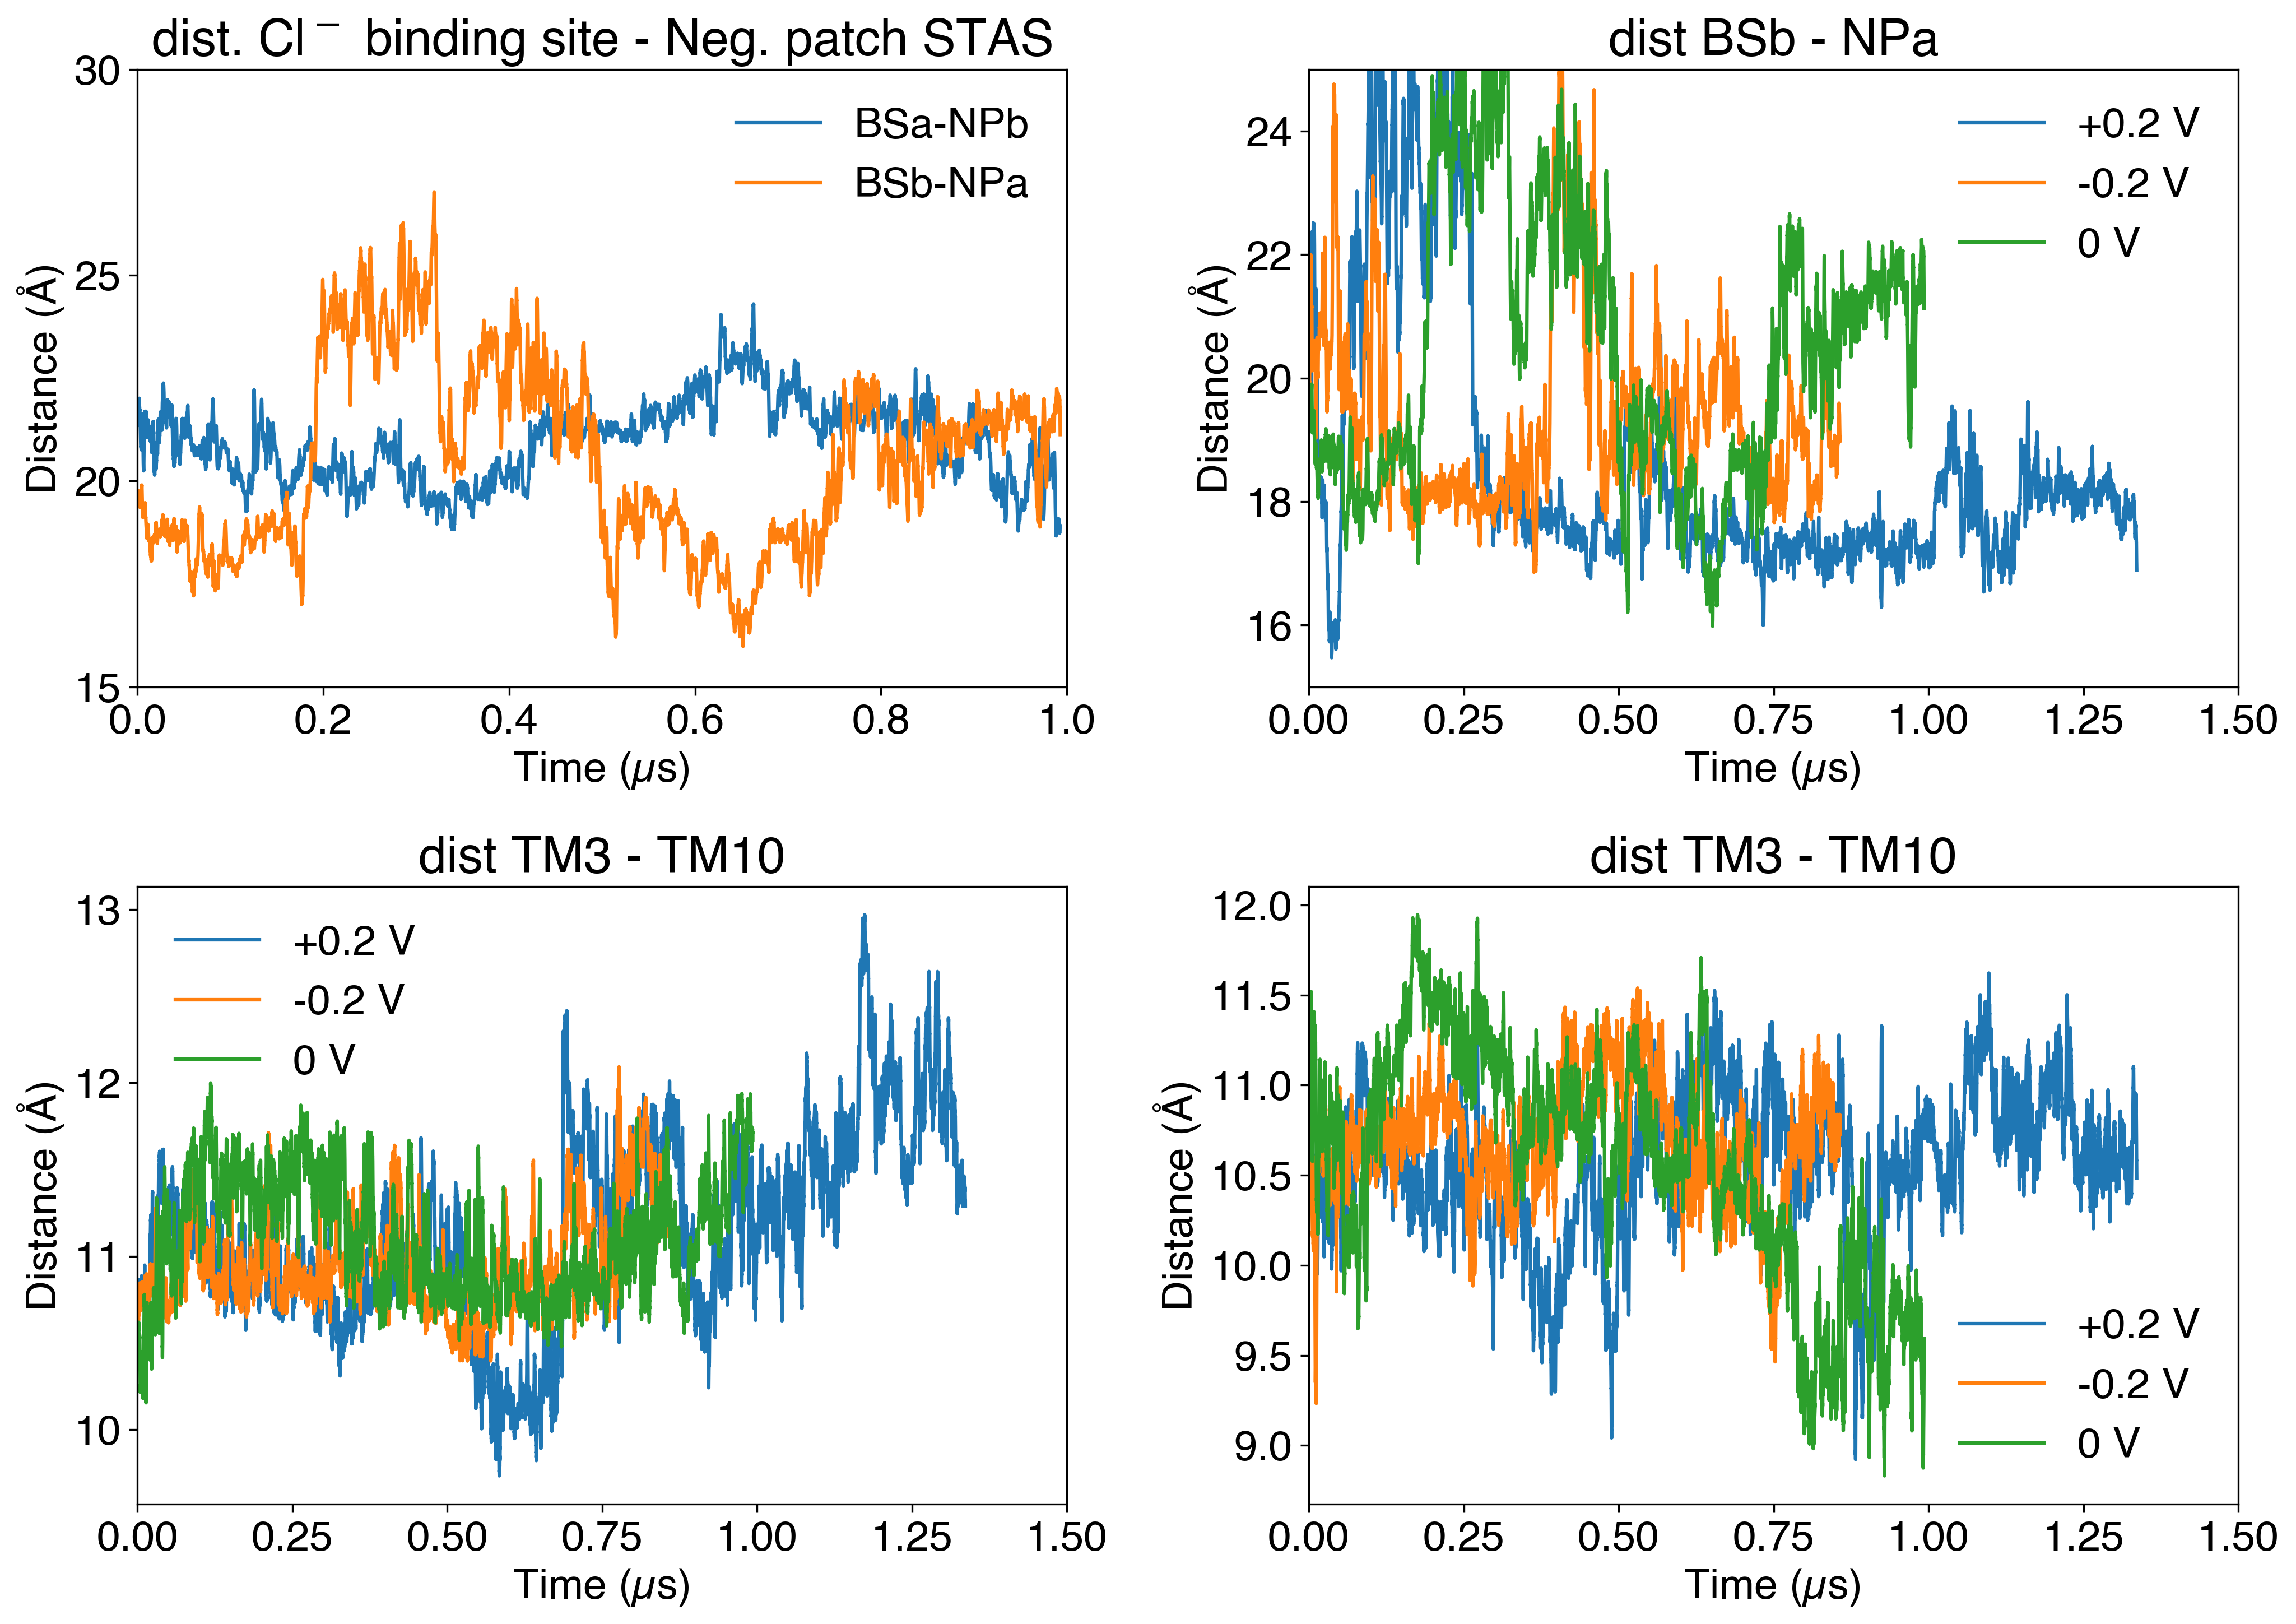

In [81]:

# 0     1                   2        3                  4                5           6               7          8        9           10      11
# $i $Rmsd_prot_alProt $dBSa_NPb $dBSb_NPa $dctTM6a_midTM12a $dctTM6b_midTM12b $dTM3a_TM10a $dTM3b_TM10b $d399a_137a $d399b_137b $d399a_499a $d399b_499b 
#   12            13         14       15     16      17
# $zd399a_499a $zd399b_499b $TM3za $TM10za $TM3zb $TM10zb"

# Distances
dists_neg2  = np.genfromtxt(dist_neg2)
dists_neg  = np.genfromtxt(dist_neg)
dists_eq  = np.genfromtxt(dist_eq)

#Rolling averages -- time evol

ra_dists_neg2 =np.mean(rolling_window(dists_neg2,100), 1)
ra_dists_neg =np.mean(rolling_window(dists_neg,100), 1)
ra_dists_eq  =np.mean(rolling_window(dists_eq ,50),  1)

plt.figure(1,figsize = (14,10)) 

#BS_NP Inter comp
#AB
plt.subplot(221)
#plt.plot((ra_dists_neg2[:,0]*0.00001),(ra_dists_neg2[:,2]), label='+0.2 V')
#plt.plot((ra_dists_neg[:,0]*0.00001),(ra_dists_neg[:,2]), label='-0.2 V')
plt.plot((ra_dists_eq [:,0]*0.00002),(ra_dists_eq [:,2]), label='BSa-NPb')
plt.plot((ra_dists_eq [:,0]*0.00002),(ra_dists_eq [:,3]), label='BSb-NPa')

plt.ylim([15, 30])
plt.xlim([0, 1.0])
plt.xlabel('Time (µs)')
plt.ylabel('Distance (Å)')
plt.yticks(np.arange(15, 30.1, 5))
plt.title('dist. Cl$^-$ binding site - Neg. patch STAS')
plt.legend(loc='best', frameon=False)

#BA

plt.subplot(222)
plt.plot((ra_dists_neg2[:,0]*0.00001),(ra_dists_neg2[:,3]), label='+0.2 V')
plt.plot((ra_dists_neg[:,0]*0.00001),(ra_dists_neg[:,3]), label='-0.2 V')
plt.plot((ra_dists_eq [:,0]*0.00002),(ra_dists_eq [:,3]), label='0 V')

plt.ylim([15, 25])
plt.xlim([0, 1.5])
plt.xlabel('Time (µs)')
plt.ylabel('Distance (Å)')
plt.title('dist BSb - NPa')
plt.legend(loc='best', frameon=False)

# Dist TM3 - TM10

#A
plt.subplot(223)
plt.plot((ra_dists_neg2[:,0]*0.00001),(ra_dists_neg2[:,8]), label='+0.2 V')
plt.plot((ra_dists_neg[:,0]*0.00001),(ra_dists_neg[:,8]), label='-0.2 V')
plt.plot((ra_dists_eq [:,0]*0.00002),(ra_dists_eq [:,8]), label='0 V')

#plt.ylim([0, 32])
plt.xlim([0, 1.5])
plt.xlabel('Time (µs)')
plt.ylabel('Distance (Å)')
plt.title('dist TM3 - TM10')
plt.legend(loc='best', frameon=False)

#B

plt.subplot(224)
plt.plot((ra_dists_neg2[:,0]*0.00001),(ra_dists_neg2[:,9]), label='+0.2 V')
plt.plot((ra_dists_neg[:,0]*0.00001),(ra_dists_neg[:,9]), label='-0.2 V')
plt.plot((ra_dists_eq [:,0]*0.00002),(ra_dists_eq [:,9]), label='0 V')

#plt.ylim([0, 15])
plt.xlim([0, 1.5])
plt.xlabel('Time (µs)')
plt.ylabel('Distance (Å)')
plt.title('dist TM3 - TM10')
plt.legend(loc='best', frameon=False)

plt.tight_layout()  
plt.savefig("/Users/capitank/Library/CloudStorage/Dropbox/USS_Lab/Investigacion/Prestin/Prestin_2023/MD_AA/hsPres_AF2_ebi/results/hPres_AF2ebi_BSnpDist.pdf", dpi=300)
plt.show()

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


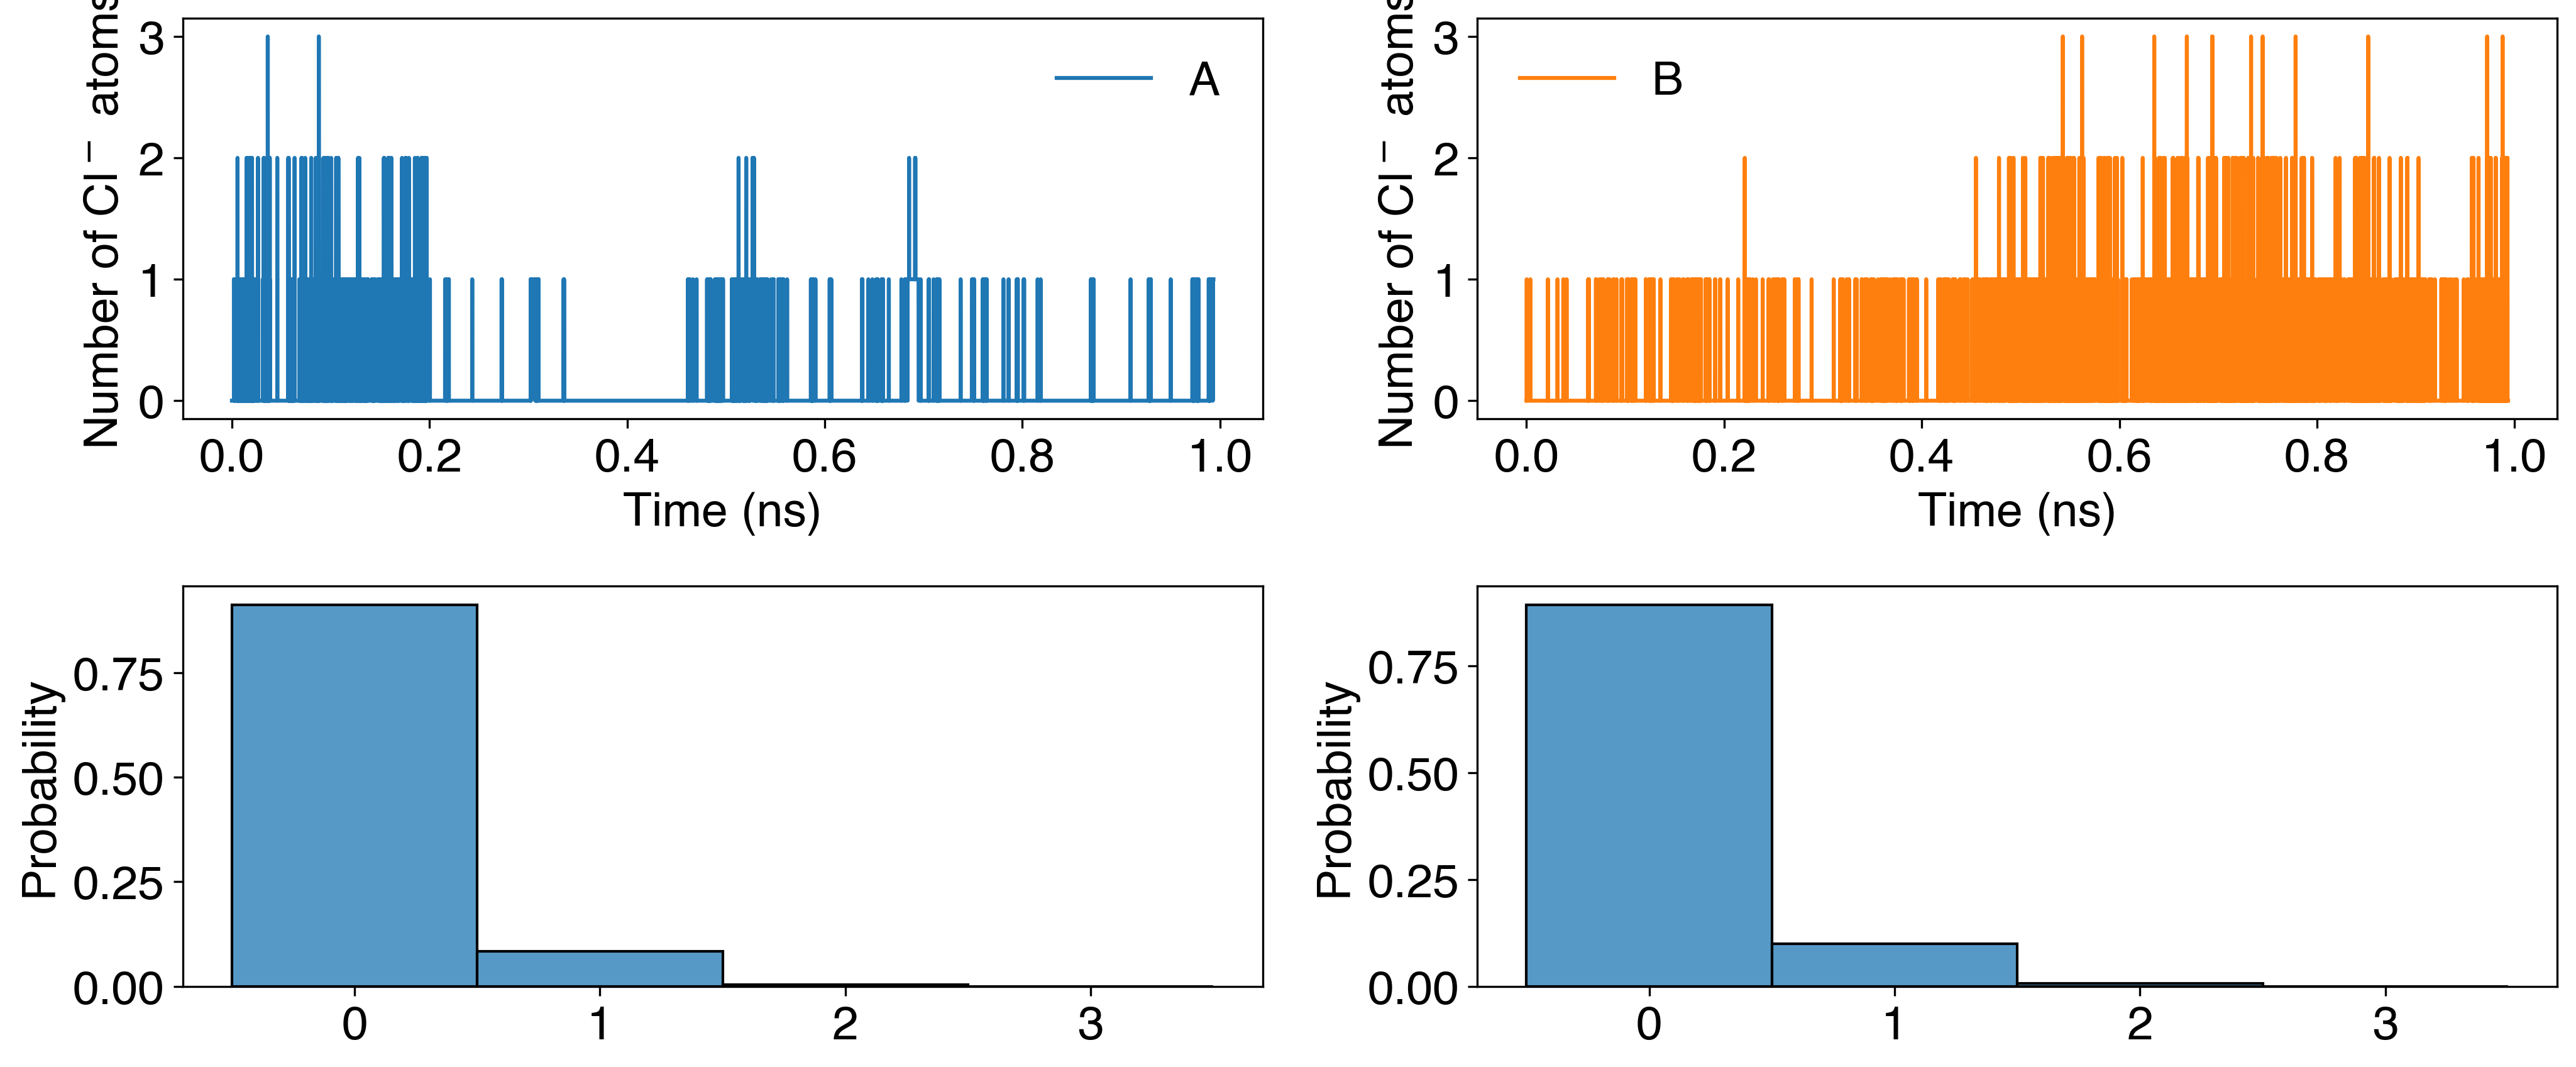

In [87]:
# CL occup
# 0     1              2              3            4
#$i [$cl_BSa num] [$cl_BVa num] [$cl_BSb num] [$cl_BVb num]

# Distances
ocups_neg2  = np.genfromtxt(occup_neg2)
ocups_neg  = np.genfromtxt(occup_neg)
ocups_eq  = np.genfromtxt(occup_eq)

#Rolling averages -- time evol

ra_ocups_neg2 =np.mean(rolling_window(ocups_neg2,100), 1)
ra_ocups_neg =np.mean(rolling_window(ocups_neg,100), 1)
ra_ocups_eq  =np.mean(rolling_window(ocups_eq ,50),  1)

plt.figure(1,figsize = (14,6)) 


#CL BS - A
plt.subplot(221)
#plt.plot((ocups_neg2[:,0]*0.00001),(ocups_neg2[:,1]), label='+0.2 V')
#plt.plot((ocups_neg[:,0]*0.00001),(ocups_neg[:,1]), label='-0.2 V')
plt.plot((ocups_eq [:,0]*0.00002),(ocups_eq [:,1]), label='A')
#plt.ylim([0, 25])
#plt.xlim([0, 250])
plt.xlabel('Time (ns)')
plt.ylabel('Number of Cl$^-$ atoms')
#plt.title('CLpcps_r1')
plt.legend(loc='best', frameon=False)

#CL BS - B
plt.subplot(222)
#plt.plot((ocups_neg2[:,0]*0.00001),(ocups_neg2[:,3]), label='+0.2 V')
#plt.plot((ocups_neg[:,0]*0.00001),(ocups_neg[:,3]), label='-0.2 V')
plt.plot((ocups_eq [:,0]*0.00002),(ocups_eq [:,3]), label='B', color='C1')
#plt.ylim([0, 25])
#plt.xlim([0, 250])
plt.xlabel('Time (ns)')
plt.ylabel('Number of Cl$^-$ atoms')
#plt.title('CLpcps_r1')
plt.legend(loc='best', frameon=False)

#CL BV



plt.subplot(223)
#sns.histplot((ocups_neg2[:,2]),stat='probability',bins=10,binrange=(0,10),alpha=1)
#sns.histplot((ocups_neg[:,2]),stat='probability',bins=10,binrange=(0,10),alpha=1)
#sns.histplot((ocups_eq[:,1]),stat='probability',bins=4,binrange=(0,4),alpha=1)
sns.histplot((ocups_eq[:,1]),stat='probability',discrete=True)
#sns.histplot((cl_BS_Baa[:,1]),stat='probability',color='orange',bins=4,binrange=(0,1),alpha=1)
#sns.distplot((cl_BS_Aaa[:,1]),bins=np.arange(0,1),hist_kws=dict(ec="k"),hist=True, kde_kws={'bw':1})
#sns.distplot((cl_BS_Baa[:,1]),bins=np.arange(0,1),  kde_kws={'bw':1})
#sns.histplot((cl_BS_Aaa[:,1]), bins=4,stat='frequency',label='A',kde=True,kde_kws={'bw':1})
#sns.histplot((cl_BS_Baa[:,1]), bins=4,stat='frequency',color='orange',label='B')

plt.subplot(224)
#sns.histplot((ocups_neg2[:,2]),stat='probability',bins=10,binrange=(0,10),alpha=1)
#sns.histplot((ocups_neg[:,2]),stat='probability',bins=10,binrange=(0,10),alpha=1)
#sns.histplot((ocups_eq[:,1]),stat='probability',bins=4,binrange=(0,4),alpha=1)
sns.histplot((ocups_eq[:,3]),stat='probability',discrete=True, color='C0')
#sns.histplot((cl_BS_Baa[:,1]),stat='probability',color='orange',bins=4,binrange=(0,1),alpha=1)
#sns.distplot((cl_BS_Aaa[:,1]),bins=np.arange(0,1),hist_kws=dict(ec="k"),hist=True, kde_kws={'bw':1})
#sns.distplot((cl_BS_Baa[:,1]),bins=np.arange(0,1),  kde_kws={'bw':1})
#sns.histplot((cl_BS_Aaa[:,1]), bins=4,stat='frequency',label='A',kde=True,kde_kws={'bw':1})
#sns.histplot((cl_BS_Baa[:,1]), bins=4,stat='frequency',color='orange',label='B')

#plt.subplot(224)
#plt.plot((ra_dists_eq [:,3]),(ocups_eq [:,2]), label='0 V')

#plt.xlabel('TFN-TFC angle (deg.)')
#plt.ylabel('Probability density')
#plt.title('Comparison')
#plt.xlim([0, 180])
#plt.ylim([0, 0.1])
#legend(loc='best', frameon = False)

plt.tight_layout()  
plt.savefig("/Users/capitank/Library/CloudStorage/Dropbox/USS_Lab/Investigacion/Prestin/Prestin_2023/MD_AA/hsPres_AF2_ebi/results/hPres_AF2ebi_Cloccup.pdf", dpi=300)
plt.show()

In [71]:
ocup_eq_a_avg=np.mean(ocups_eq[:,1])
ocup_eq_a_std=np.std(ocups_eq[:,1])

ocup_p_a_avg=np.mean(ocups_neg2[:,1])
ocup_p_a_std=np.std(ocups_neg2[:,1])

ocup_n_a_avg=np.mean(ocups_neg[:,1])
ocup_n_a_std=np.std(ocups_neg[:,1])



print ('MPC')
print ('EqA=', np.round(ocup_eq_a_avg,decimals=1), '±', np.round(ocup_eq_a_std,decimals=2))
print ('plusA=', np.round(ocup_p_a_avg,decimals=1), '±', np.round(ocup_p_a_std,decimals=2))
print ('negA=', np.round(ocup_n_a_avg,decimals=1), '±', np.round(ocup_n_a_std,decimals=2))


MPC
EqA= 0.1 ± 0.3
plusA= 0.4 ± 0.59
negA= 0.4 ± 0.61


## TMD - STAS (adjacent monomer) Contacts

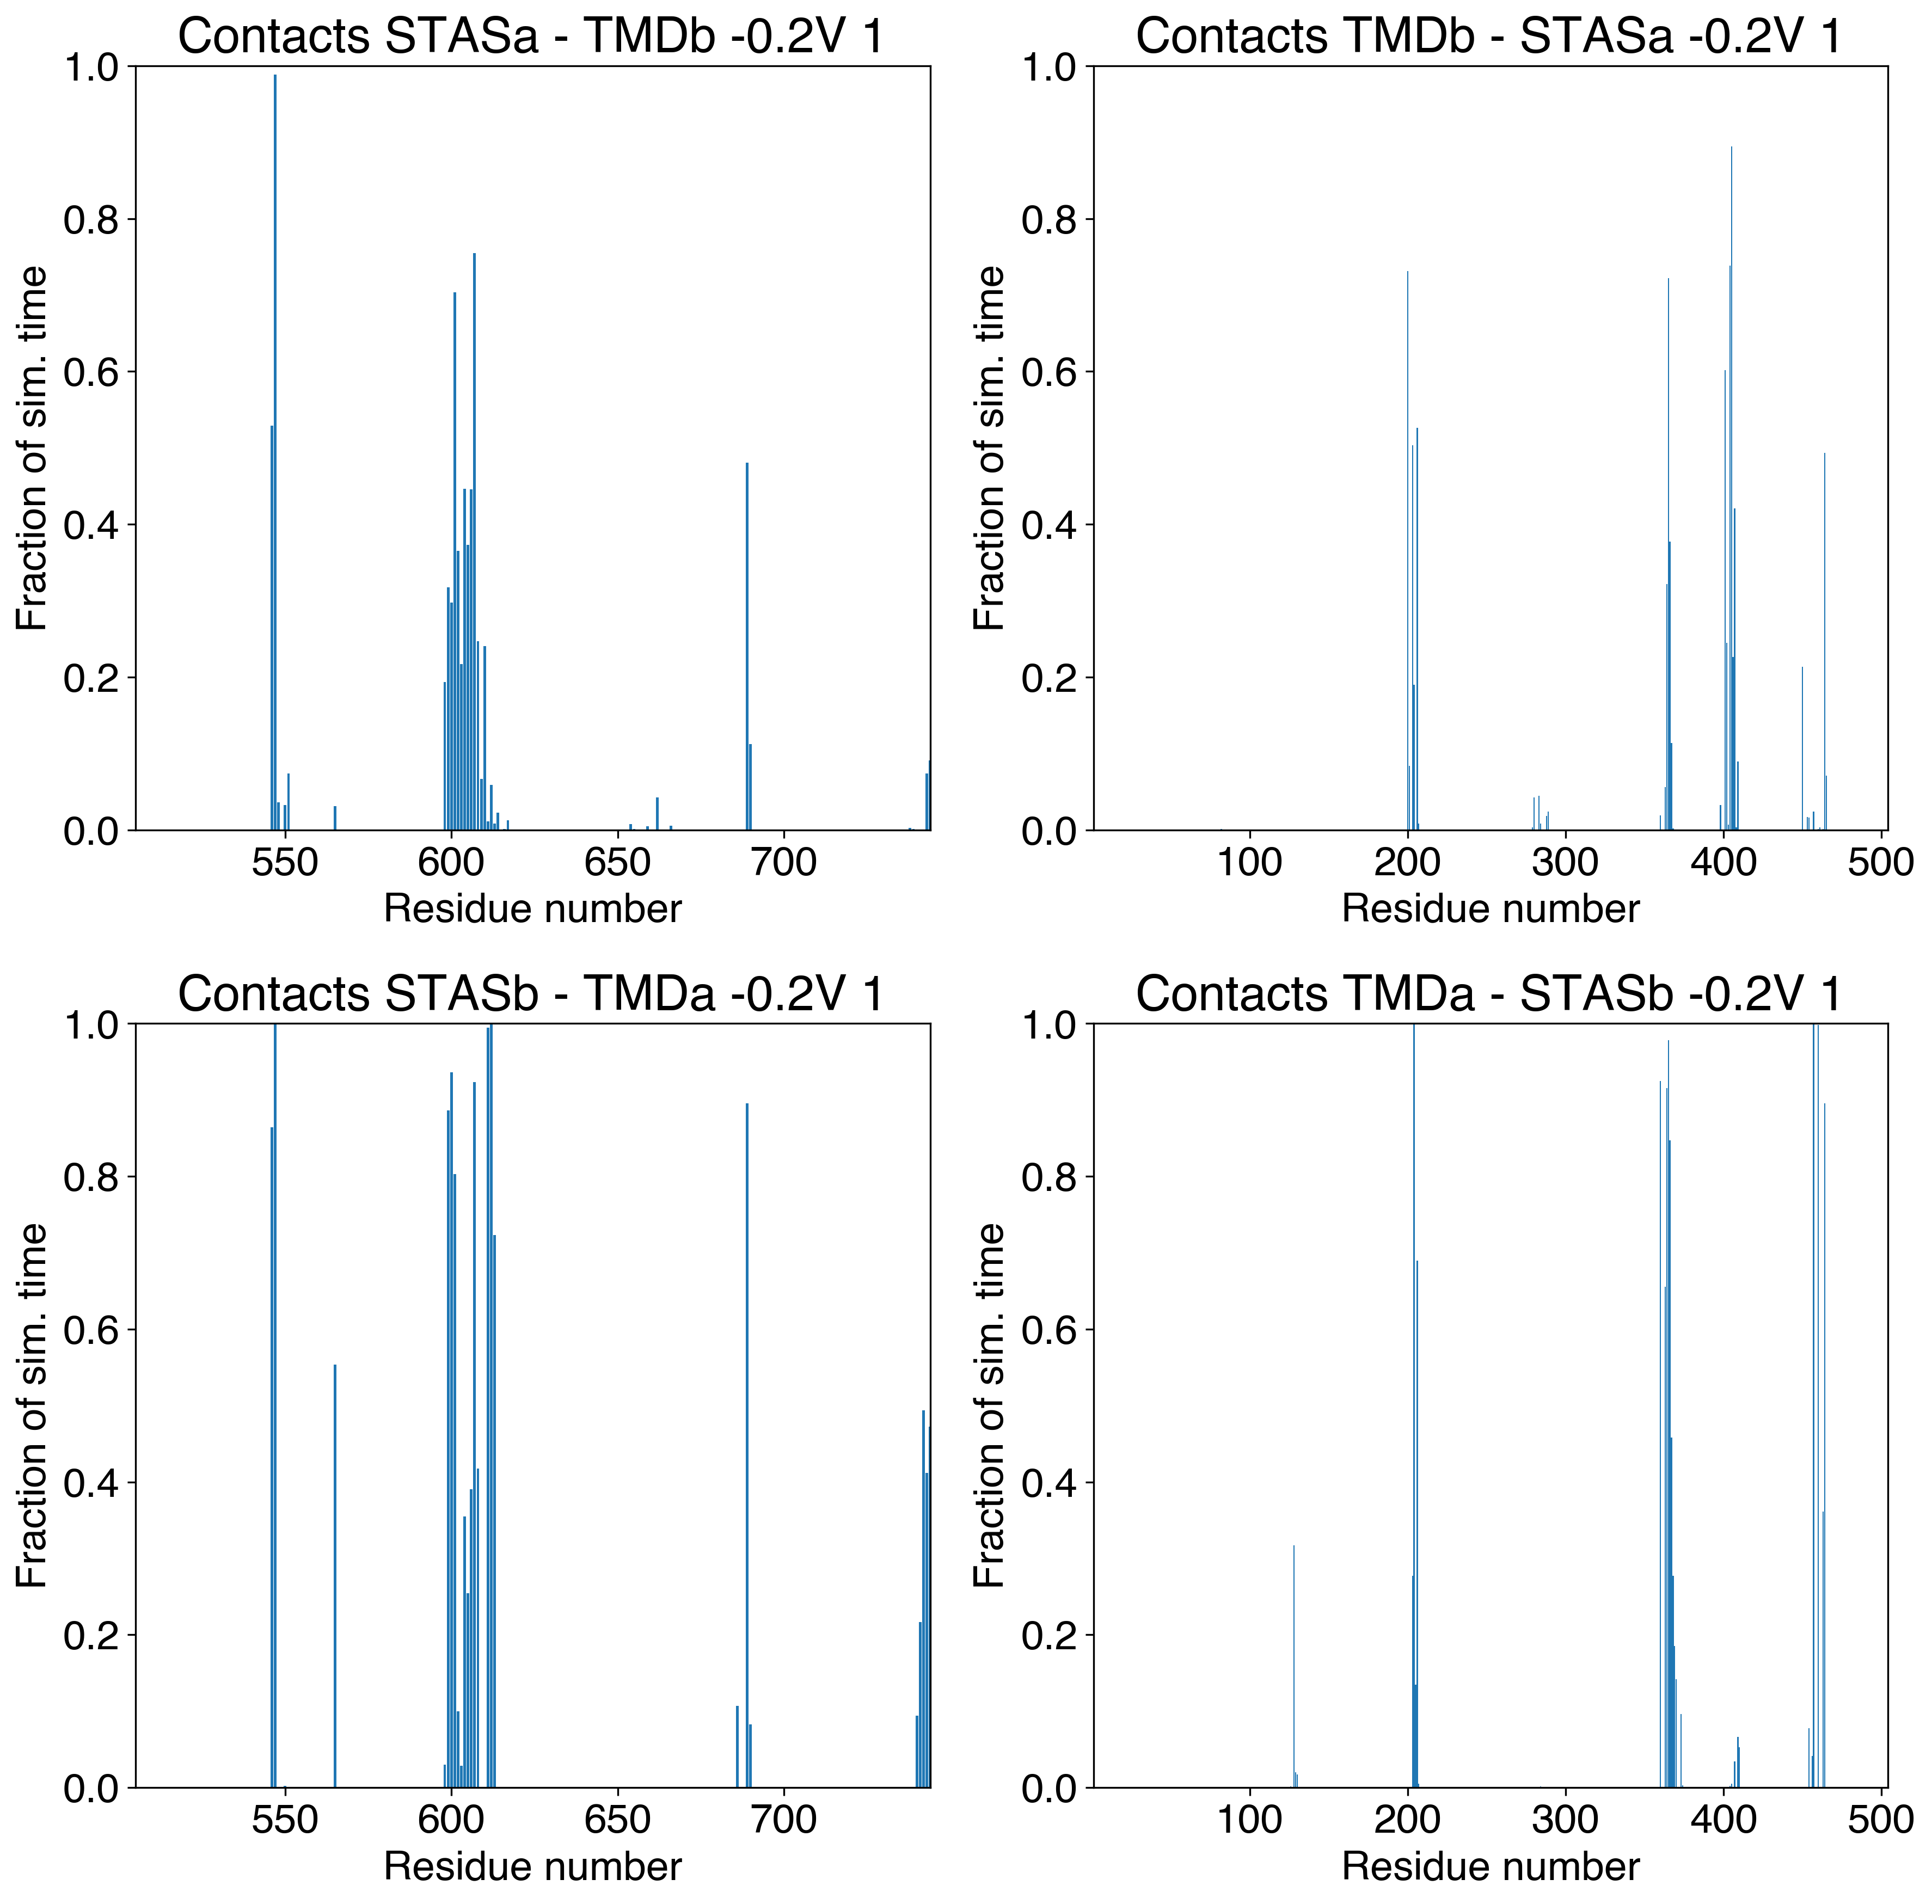

In [6]:
## Contacts -0.2 V r1
 

plt.figure( figsize = (12,12)) 
##CGm3pws10_PCPS ##
plt.subplot(221)
with open(STASa_TMDb_neg, 'r') as fd:
    lines1 = fd.read().split() 
    counter1 = Counter(lines1)
    items1 = sorted(counter1.items(), key=lambda x: int(x[0]))
    num_items1 = np.array(items1, dtype=int)
    plt.xlabel('Residue number')
    plt.ylabel('Fraction of sim. time')
    plt.title('Contacts STASa - TMDb -0.2V 1')
    plt.bar((num_items1[:,0]), (num_items1[:,1]/85824))
    plt.ylim([0, 1])
    plt.xlim([505, 744])

plt.subplot(222)
with open(TMDb_STASa_neg, 'r') as fd:
    lines1 = fd.read().split() 
    counter1 = Counter(lines1)
    items1 = sorted(counter1.items(), key=lambda x: int(x[0]))
    num_items1 = np.array(items1, dtype=int)
    plt.xlabel('Residue number')
    plt.ylabel('Fraction of sim. time')
    plt.title('Contacts TMDb - STASa -0.2V 1')
    plt.bar((num_items1[:,0]), (num_items1[:,1]/85824))
    plt.ylim([0, 1])
    #plt.xticks(np.arange(0, 500, 100))
    plt.xlim([1, 504])

##CGm3pws10_PCPS ##
plt.subplot(223)
with open(STASb_TMDa_neg, 'r') as fd:
    lines1 = fd.read().split() 
    counter1 = Counter(lines1)
    items1 = sorted(counter1.items(), key=lambda x: int(x[0]))
    num_items1 = np.array(items1, dtype=int)
    plt.xlabel('Residue number')
    plt.ylabel('Fraction of sim. time')
    plt.title('Contacts STASb - TMDa -0.2V 1')
    plt.bar((num_items1[:,0]), (num_items1[:,1]/85824))
    plt.ylim([0, 1])
    plt.xlim([505, 744])    

plt.subplot(224)
with open(TMDa_STASb_neg, 'r') as fd:
    lines1 = fd.read().split() 
    counter1 = Counter(lines1)
    items1 = sorted(counter1.items(), key=lambda x: int(x[0]))
    num_items1 = np.array(items1, dtype=int)
    plt.xlabel('Residue number')
    plt.ylabel('Fraction of sim. time')
    plt.title('Contacts TMDa - STASb -0.2V 1')
    plt.bar((num_items1[:,0]), (num_items1[:,1]/85824))
    plt.ylim([0, 1])
    plt.xlim([1, 504])


plt.tight_layout()  
#plt.savefig("/Users/capitank/Library/CloudStorage/Dropbox/USS_Lab/Investigacion/Prestin/Prestin_2023/MD_AA/hsPres_AF2_ebi/results/hPres_AF2ebi_Cloccup.pdf", dpi=300)
plt.show()

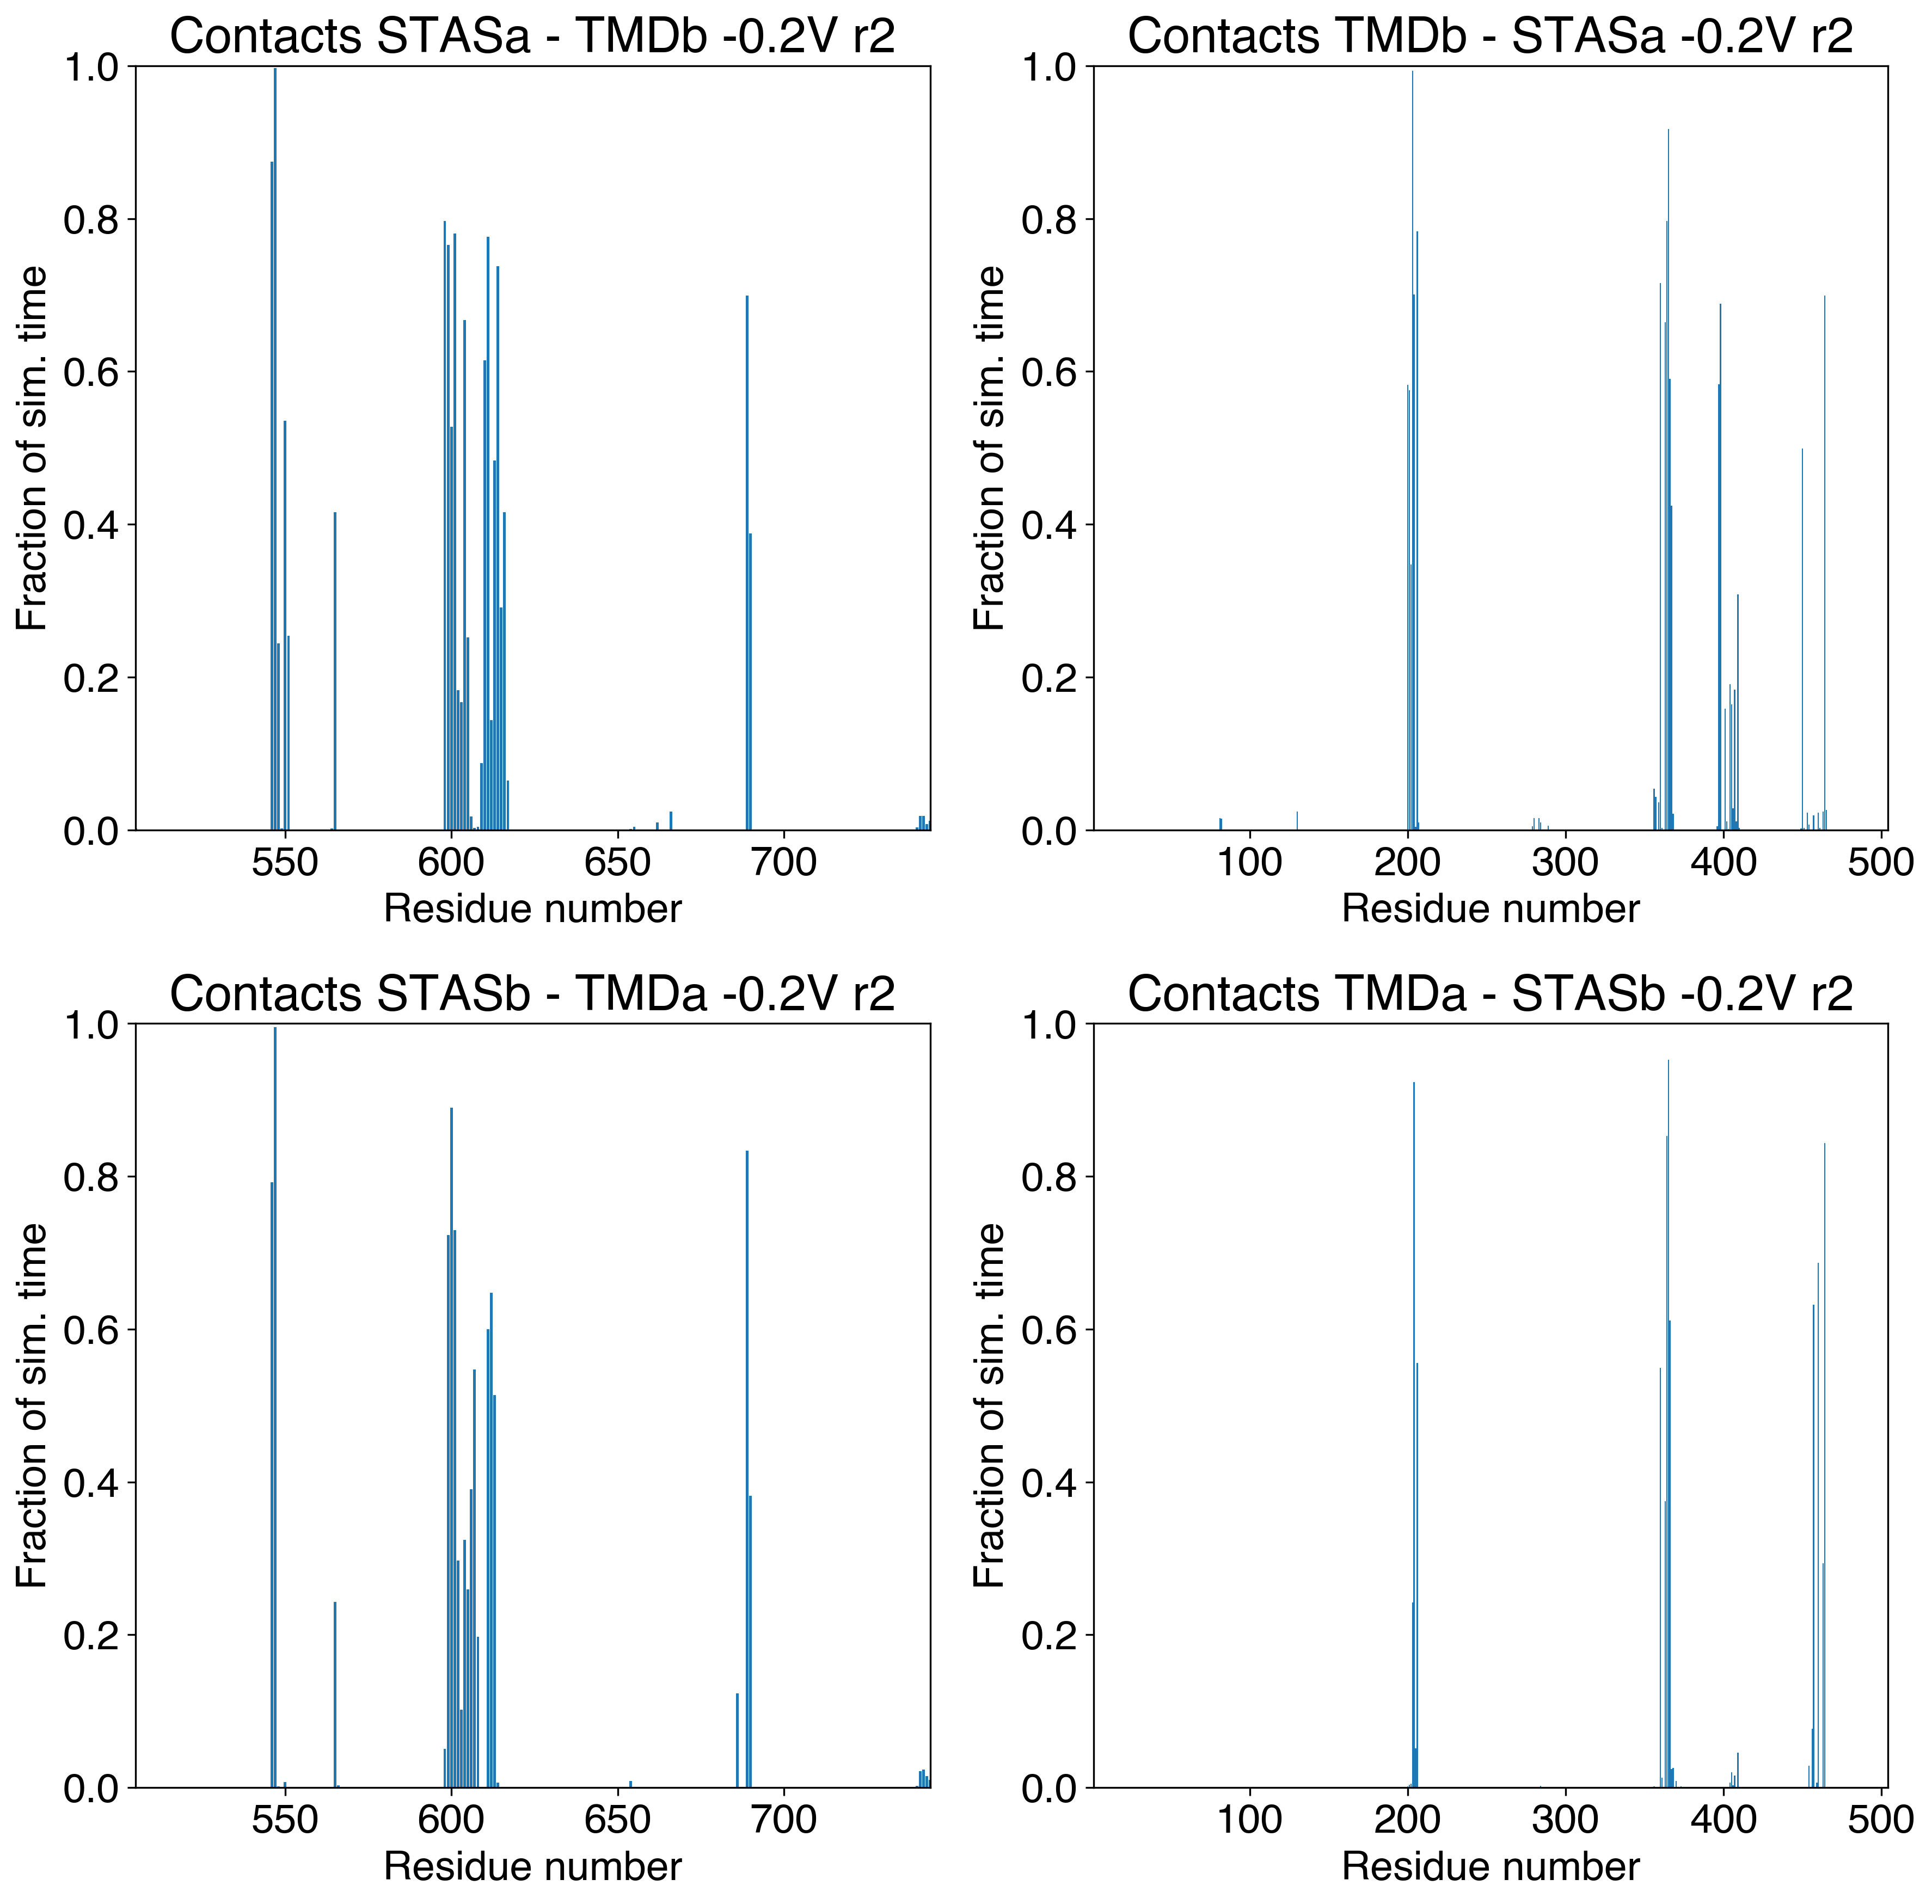

In [7]:
# Contacts -0.2 V r2

plt.figure( figsize = (12,12)) 
##CGm3pws10_PCPS ##
plt.subplot(221)
with open(STASa_TMDb_neg2, 'r') as fd:
    lines1 = fd.read().split() 
    counter1 = Counter(lines1)
    items1 = sorted(counter1.items(), key=lambda x: int(x[0]))
    num_items1 = np.array(items1, dtype=int)
    plt.xlabel('Residue number')
    plt.ylabel('Fraction of sim. time')
    plt.title('Contacts STASa - TMDb -0.2V r2')
    plt.bar((num_items1[:,0]), (num_items1[:,1]/133658))
    plt.ylim([0, 1])
    plt.xlim([505, 744])

plt.subplot(222)
with open(TMDb_STASa_neg2, 'r') as fd:
    lines1 = fd.read().split() 
    counter1 = Counter(lines1)
    items1 = sorted(counter1.items(), key=lambda x: int(x[0]))
    num_items1 = np.array(items1, dtype=int)
    plt.xlabel('Residue number')
    plt.ylabel('Fraction of sim. time')
    plt.title('Contacts TMDb - STASa -0.2V r2')
    plt.bar((num_items1[:,0]), (num_items1[:,1]/133658))
    plt.ylim([0, 1])
    #plt.xticks(np.arange(0, 500, 100))
    plt.xlim([1, 504])

##CGm3pws10_PCPS ##
plt.subplot(223)
with open(STASb_TMDa_neg2, 'r') as fd:
    lines1 = fd.read().split() 
    counter1 = Counter(lines1)
    items1 = sorted(counter1.items(), key=lambda x: int(x[0]))
    num_items1 = np.array(items1, dtype=int)
    plt.xlabel('Residue number')
    plt.ylabel('Fraction of sim. time')
    plt.title('Contacts STASb - TMDa -0.2V r2')
    plt.bar((num_items1[:,0]), (num_items1[:,1]/133658))
    plt.ylim([0, 1])
    plt.xlim([505, 744])    

plt.subplot(224)
with open(TMDa_STASb_neg2, 'r') as fd:
    lines1 = fd.read().split() 
    counter1 = Counter(lines1)
    items1 = sorted(counter1.items(), key=lambda x: int(x[0]))
    num_items1 = np.array(items1, dtype=int)
    plt.xlabel('Residue number')
    plt.ylabel('Fraction of sim. time')
    plt.title('Contacts TMDa - STASb -0.2V r2')
    plt.bar((num_items1[:,0]), (num_items1[:,1]/133658)) 
    plt.ylim([0, 1])
    plt.xlim([1, 504])

plt.tight_layout()  
#plt.savefig("/Users/capitank/Library/CloudStorage/Dropbox/USS_Lab/Investigacion/Prestin/Prestin_2023/MD_AA/hsPres_AF2_ebi/results/hPres_AF2ebi_Cloccup.pdf", dpi=300)
plt.show()

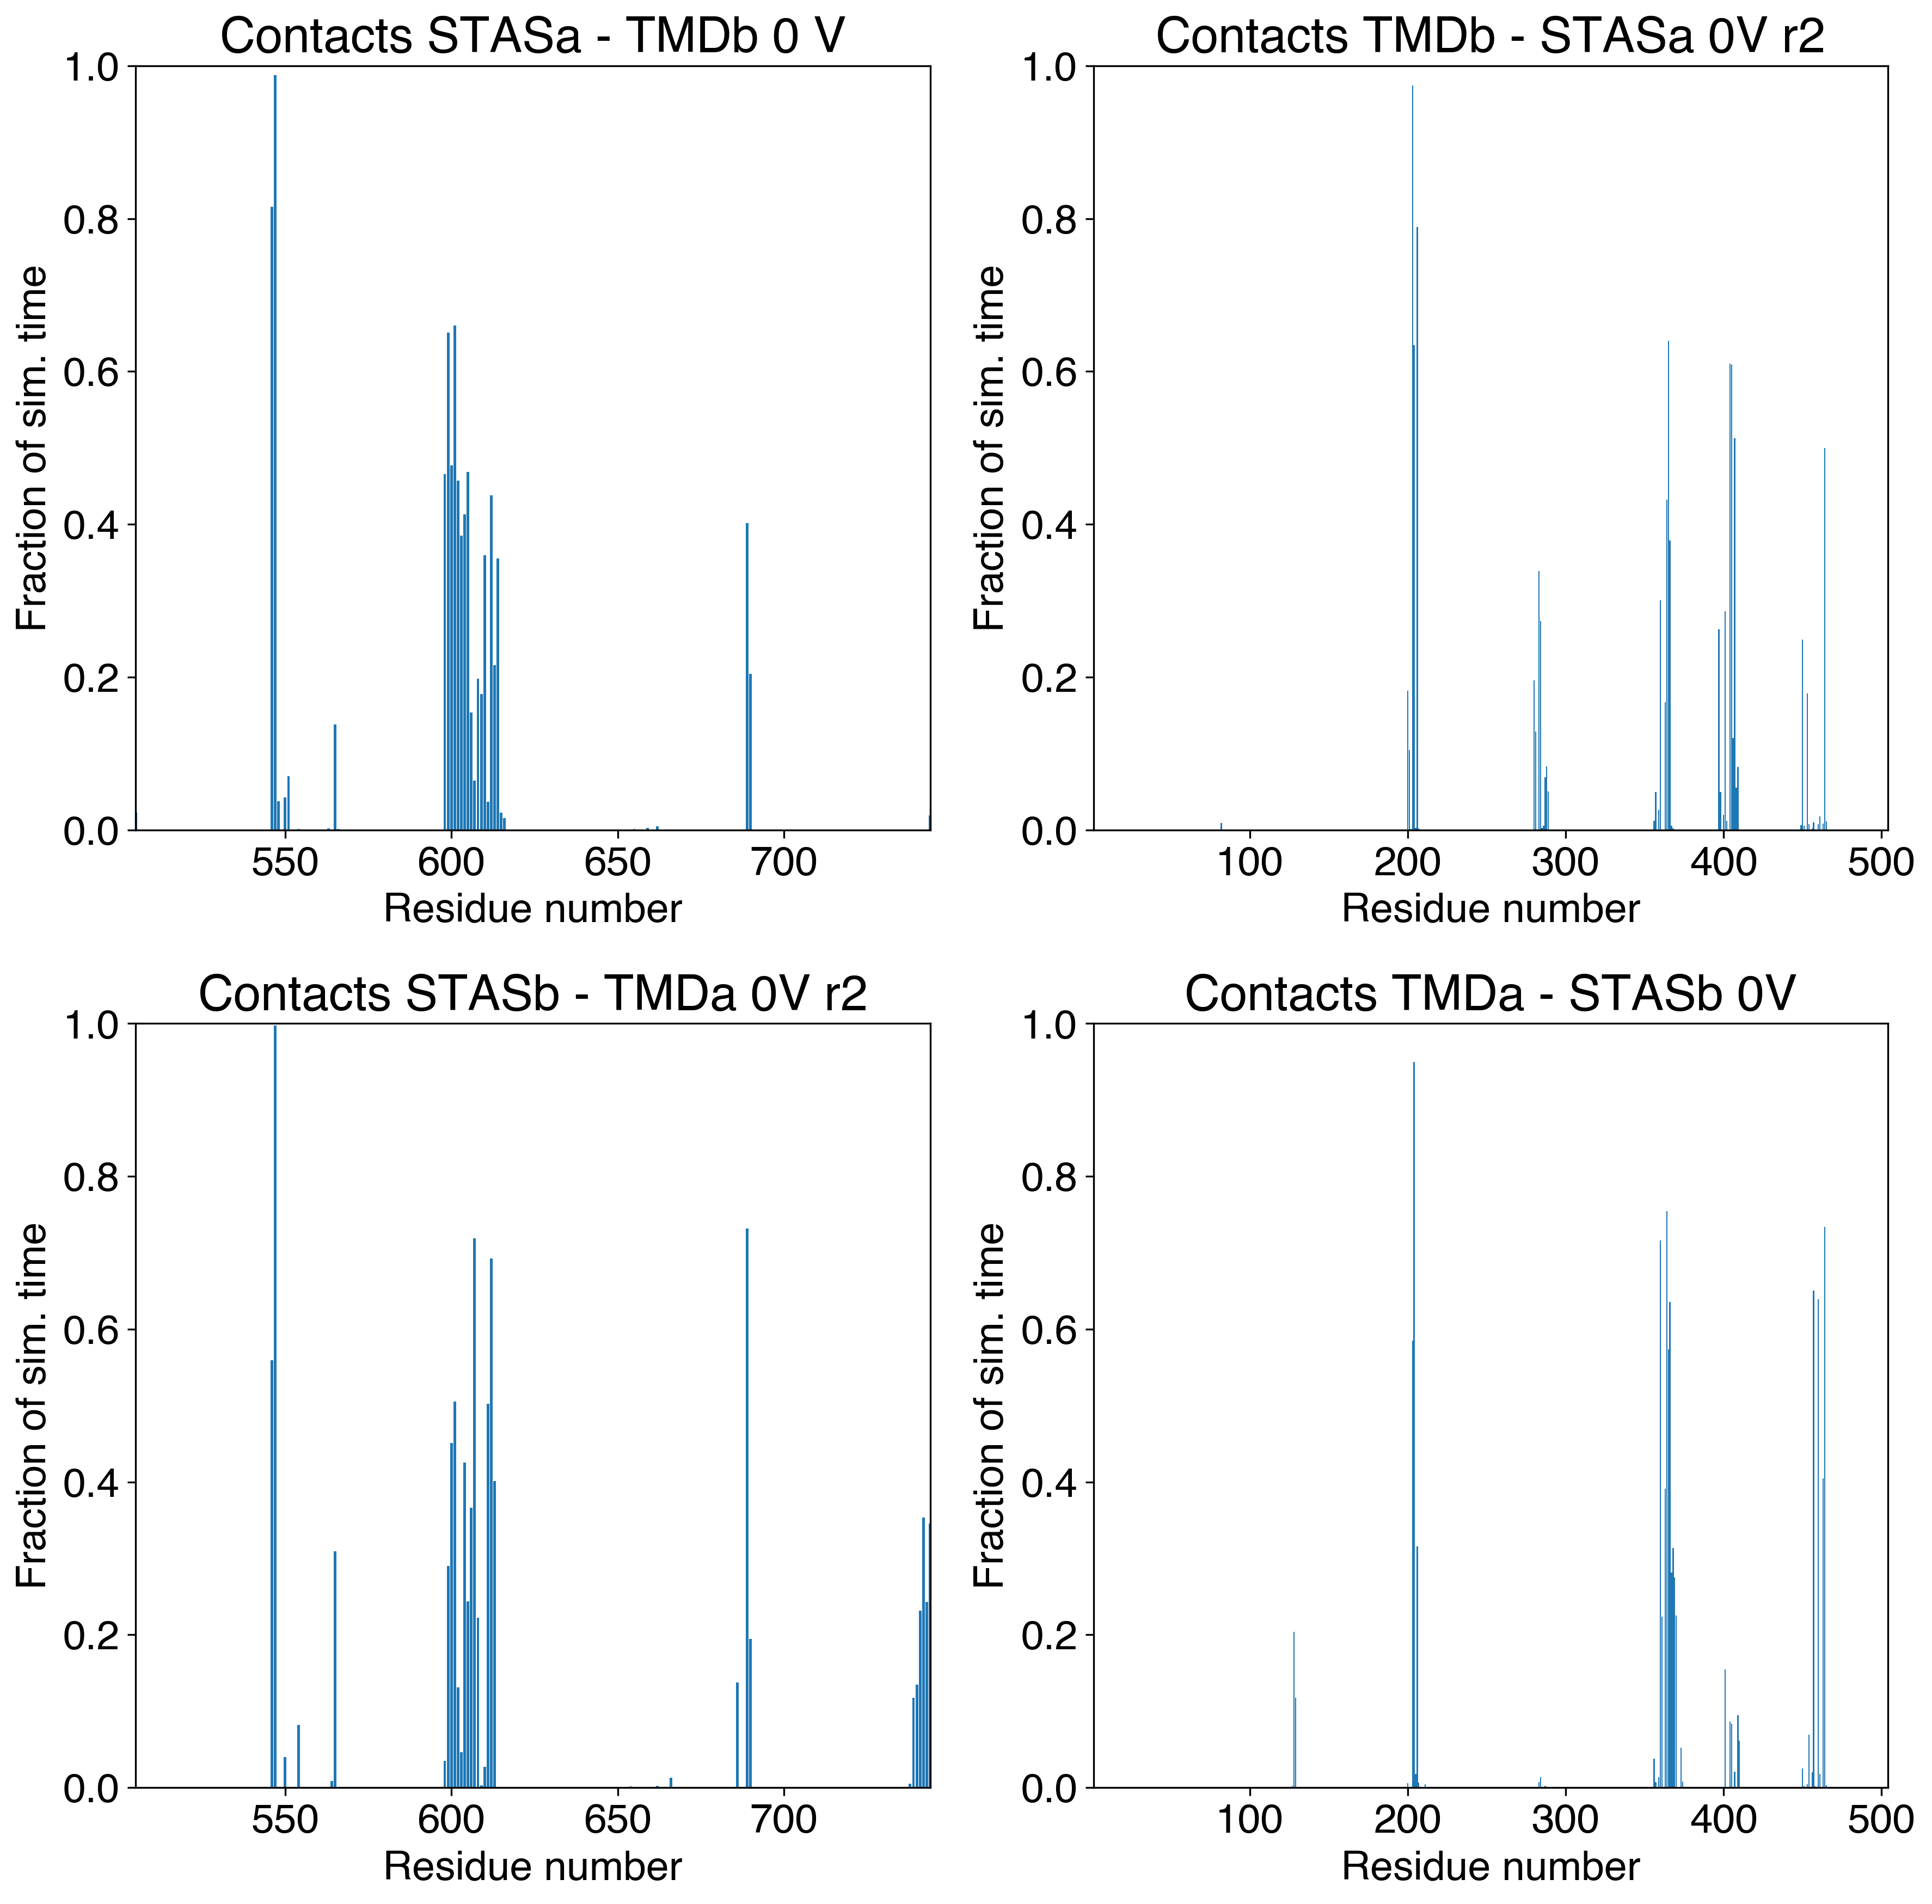

In [15]:
# Contacts 0 V

plt.figure( figsize = (12,12)) 

plt.subplot(221)
with open(STASa_TMDb_eq, 'r') as fd:
    lines1 = fd.read().split() 
    counter1 = Counter(lines1)
    items1 = sorted(counter1.items(), key=lambda x: int(x[0]))
    num_items1 = np.array(items1, dtype=int)
    plt.xlabel('Residue number')
    plt.ylabel('Fraction of sim. time')
    plt.title('Contacts STASa - TMDb 0 V')
    plt.bar((num_items1[:,0]), (num_items1[:,1]/49668))
    plt.ylim([0, 1])
    plt.xlim([505, 744])

plt.subplot(222)
with open(TMDb_STASa_eq, 'r') as fd:
    lines1 = fd.read().split() 
    counter1 = Counter(lines1)
    items1 = sorted(counter1.items(), key=lambda x: int(x[0]))
    num_items1 = np.array(items1, dtype=int)
    plt.xlabel('Residue number')
    plt.ylabel('Fraction of sim. time')
    plt.title('Contacts TMDb - STASa 0V r2')
    plt.bar((num_items1[:,0]), (num_items1[:,1]/49668))
    plt.ylim([0, 1])
    #plt.xticks(np.arange(0, 500, 100))
    plt.xlim([1, 504])

plt.subplot(223)
with open(STASb_TMDa_eq, 'r') as fd:
    lines1 = fd.read().split() 
    counter1 = Counter(lines1)
    items1 = sorted(counter1.items(), key=lambda x: int(x[0]))
    num_items1 = np.array(items1, dtype=int)
    plt.xlabel('Residue number')
    plt.ylabel('Fraction of sim. time')
    plt.title('Contacts STASb - TMDa 0V r2')
    plt.bar((num_items1[:,0]), (num_items1[:,1]/49668))
    plt.ylim([0, 1.0])
    plt.xlim([505, 744])    

plt.subplot(224)
with open(TMDa_STASb_eq, 'r') as fd:
    lines1 = fd.read().split() 
    counter1 = Counter(lines1)
    items1 = sorted(counter1.items(), key=lambda x: int(x[0]))
    num_items1 = np.array(items1, dtype=int)
    #print(len(lines1))
    plt.xlabel('Residue number')
    plt.ylabel('Fraction of sim. time')
    plt.title('Contacts TMDa - STASb 0V')
    plt.bar((num_items1[:,0]), (num_items1[:,1]/49668)) 
    plt.ylim([0, 1.0])
    plt.xlim([1, 504])

plt.tight_layout()  
#plt.savefig("/Users/capitank/Library/CloudStorage/Dropbox/USS_Lab/Investigacion/Prestin/Prestin_2023/MD_AA/hsPres_AF2_ebi/results/hPres_AF2ebi_Cloccup.pdf", dpi=300)
plt.show()


## Core - Gate contacts

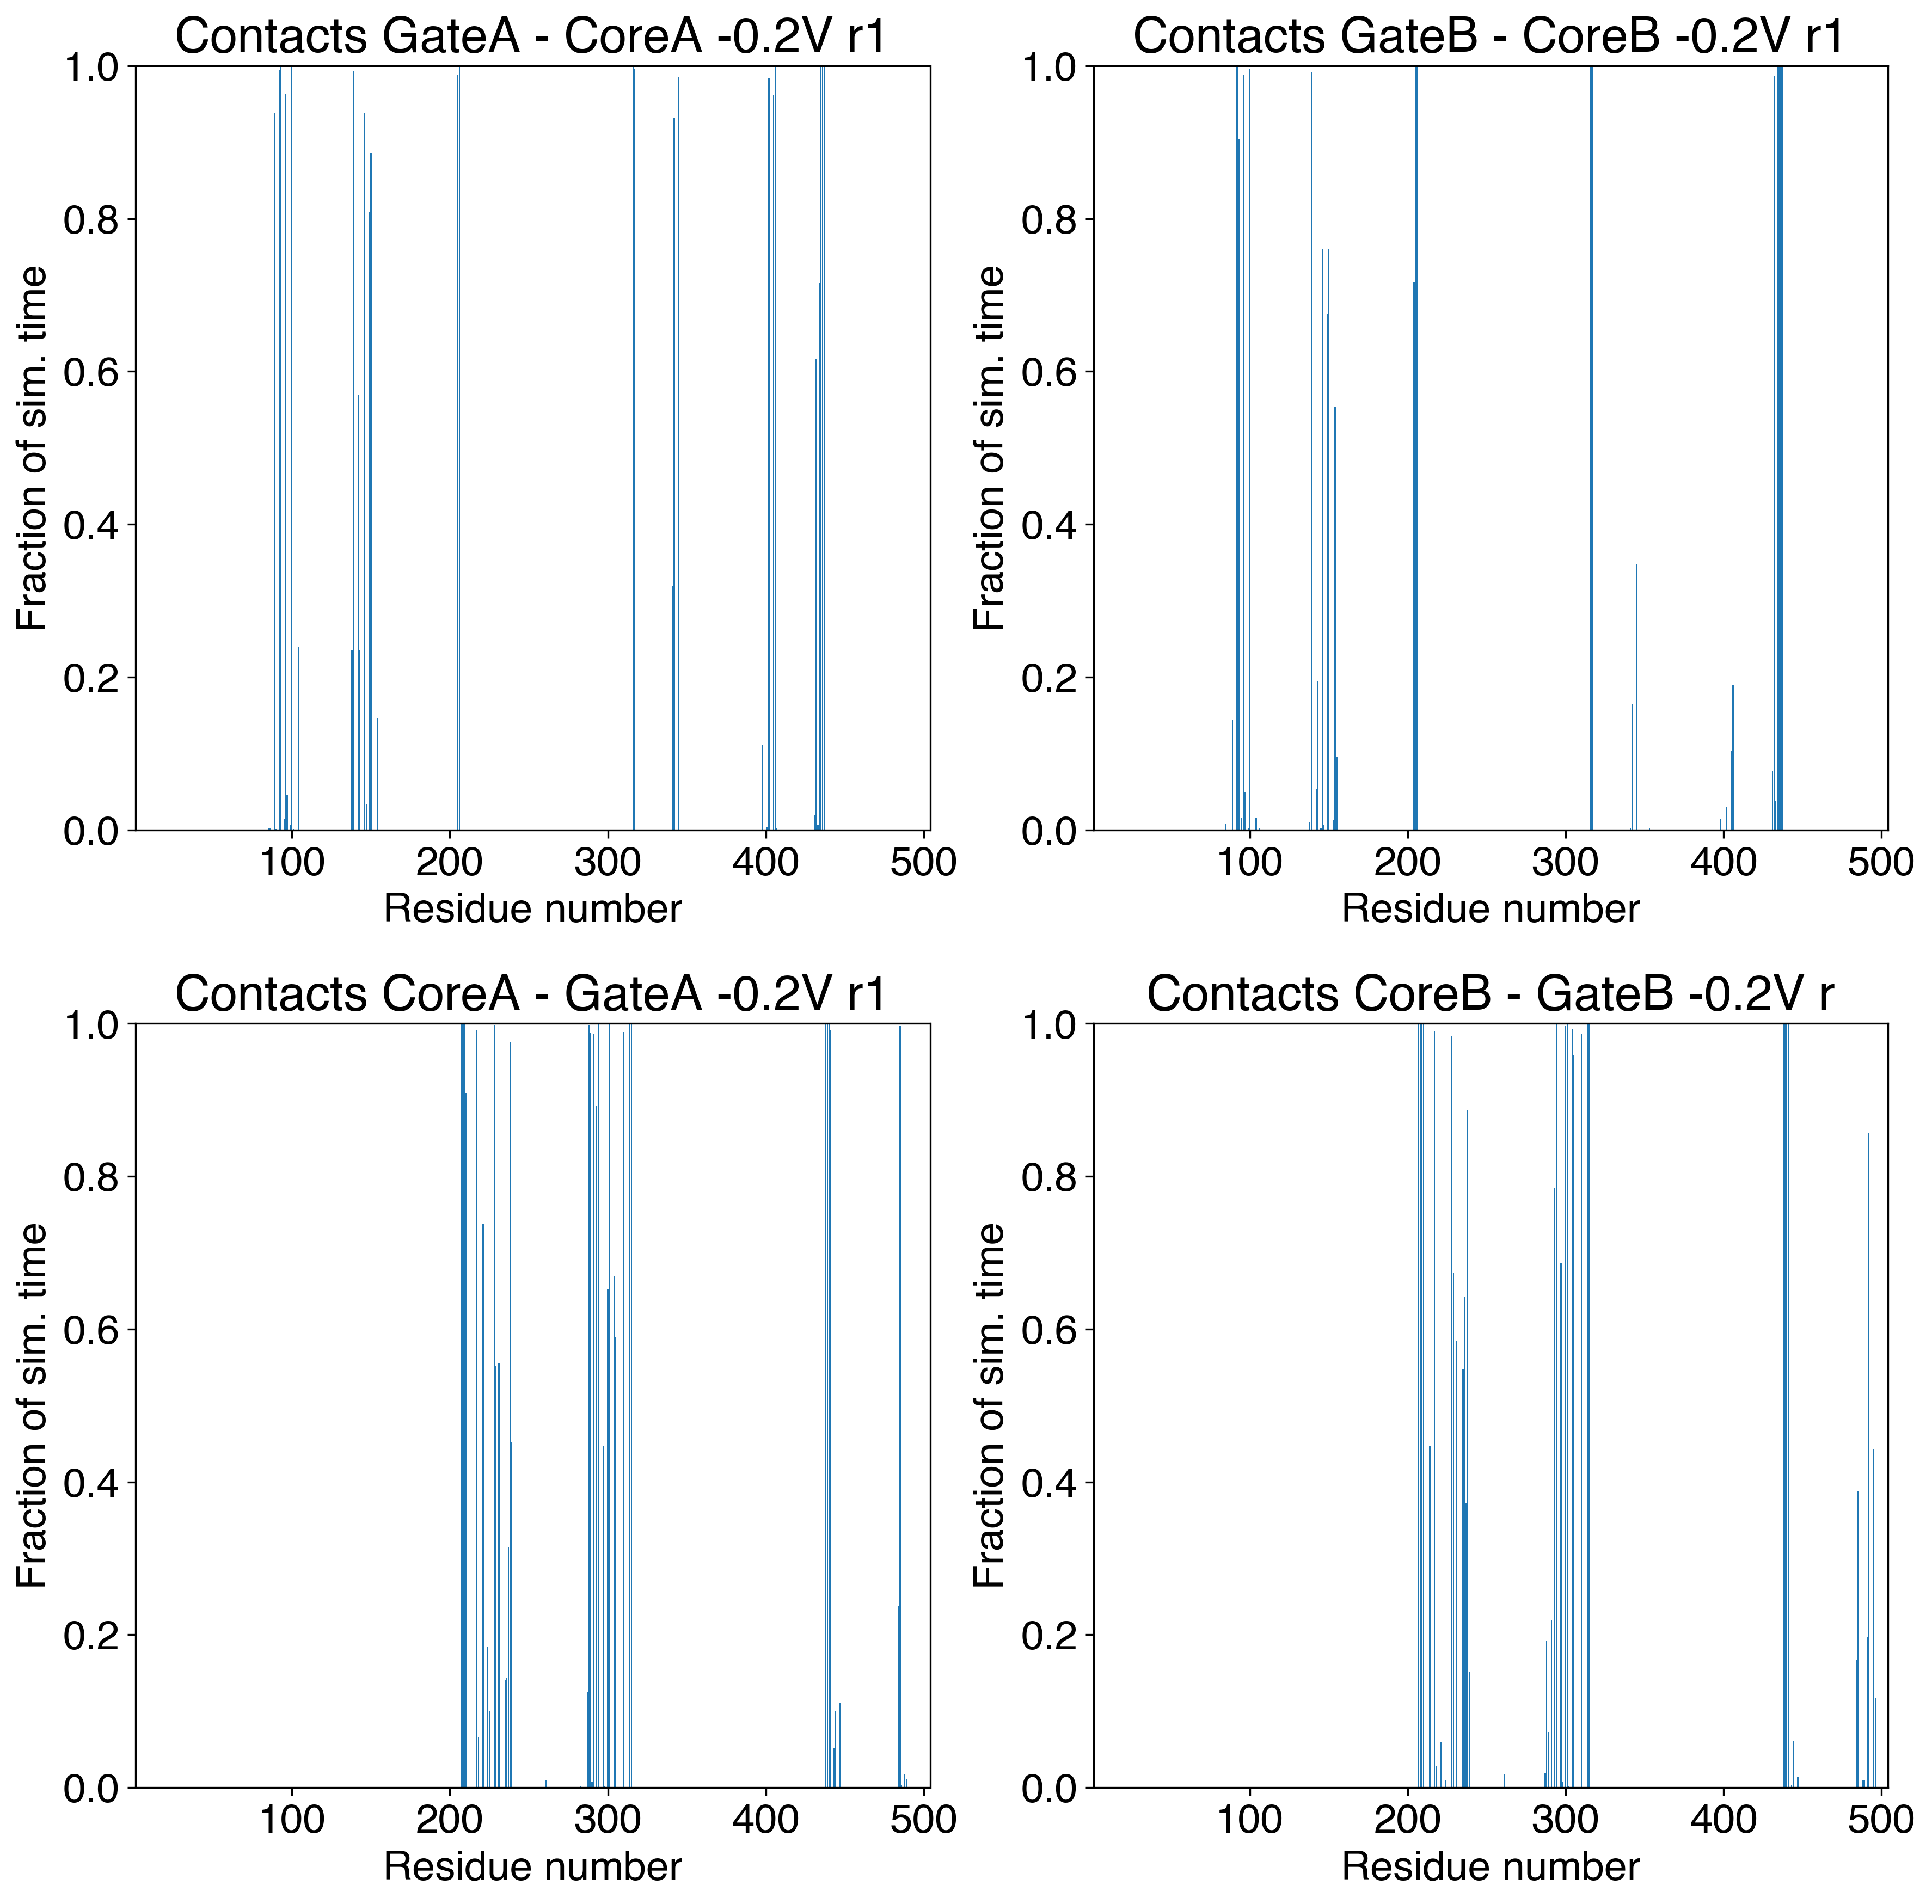

In [19]:
plt.figure( figsize = (12,12)) 

plt.subplot(221)
with open(coreA_gateA_neg, 'r') as fd:
    lines1 = fd.read().split() 
    counter1 = Counter(lines1)
    items1 = sorted(counter1.items(), key=lambda x: int(x[0]))
    num_items1 = np.array(items1, dtype=int)
    plt.xlabel('Residue number')
    plt.ylabel('Fraction of sim. time')
    plt.title('Contacts GateA - CoreA -0.2V r1')
    plt.bar((num_items1[:,0]), (num_items1[:,1]/85824))
    plt.ylim([0, 1])
    plt.xlim([1, 504])

plt.subplot(222)
with open(coreB_gateB_neg, 'r') as fd:
    lines1 = fd.read().split() 
    counter1 = Counter(lines1)
    items1 = sorted(counter1.items(), key=lambda x: int(x[0]))
    num_items1 = np.array(items1, dtype=int)
    plt.xlabel('Residue number')
    plt.ylabel('Fraction of sim. time')
    plt.title('Contacts GateB - CoreB -0.2V r1')
    plt.bar((num_items1[:,0]), (num_items1[:,1]/85824))
    plt.ylim([0, 1])
    #plt.xticks(np.arange(0, 500, 100))
    plt.xlim([1, 504])


plt.subplot(223)
with open(gateA_coreA_neg, 'r') as fd:
    lines1 = fd.read().split() 
    counter1 = Counter(lines1)
    items1 = sorted(counter1.items(), key=lambda x: int(x[0]))
    num_items1 = np.array(items1, dtype=int)
    plt.xlabel('Residue number')
    plt.ylabel('Fraction of sim. time')
    plt.title('Contacts CoreA - GateA -0.2V r1')
    plt.bar((num_items1[:,0]), (num_items1[:,1]/85824))
    plt.ylim([0, 1])
    plt.xlim([1, 504])    

plt.subplot(224)
with open(gateB_coreB_neg, 'r') as fd:
    lines1 = fd.read().split() 
    counter1 = Counter(lines1)
    items1 = sorted(counter1.items(), key=lambda x: int(x[0]))
    num_items1 = np.array(items1, dtype=int)
    plt.xlabel('Residue number')
    plt.ylabel('Fraction of sim. time')
    plt.title('Contacts CoreB - GateB -0.2V r')
    plt.bar((num_items1[:,0]), (num_items1[:,1]/85824))
    plt.ylim([0, 1])
    plt.xlim([1, 504])


plt.tight_layout()  
#plt.savefig("/Users/capitank/Library/CloudStorage/Dropbox/USS_Lab/Investigacion/Prestin/Prestin_2023/MD_AA/hsPres_AF2_ebi/results/hPres_AF2ebi_Cloccup.pdf", dpi=300)
plt.show()

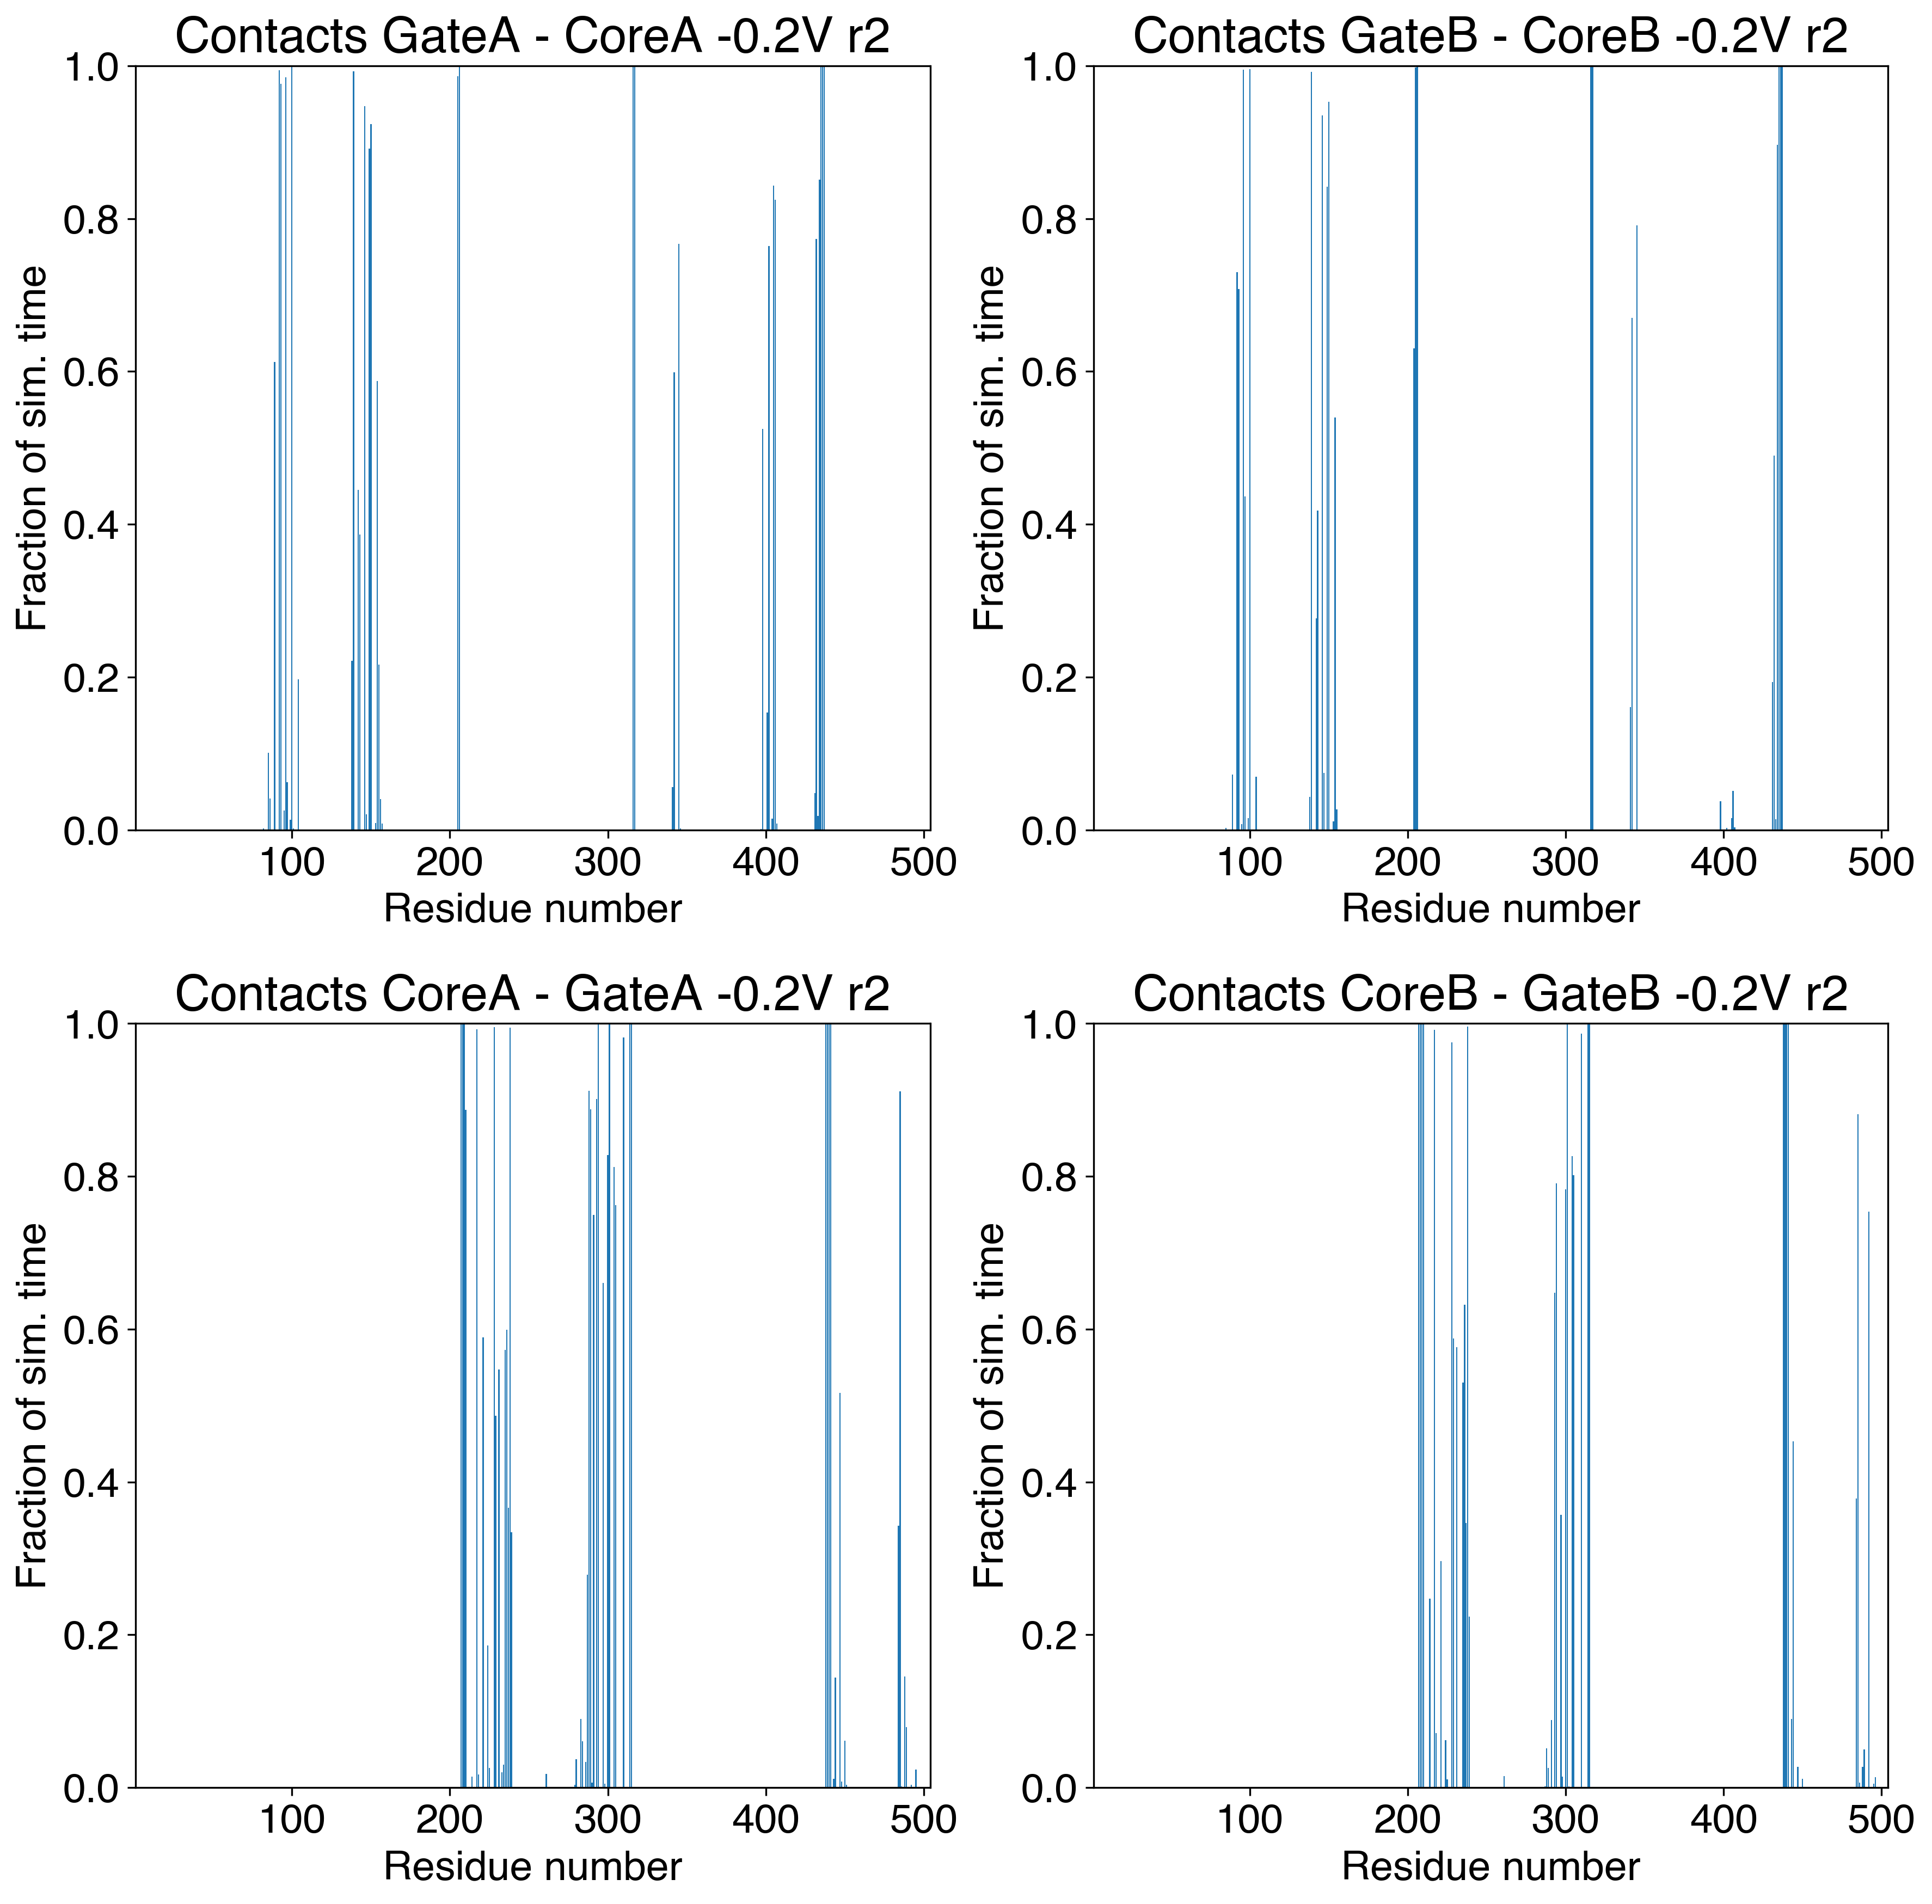

In [21]:
plt.figure( figsize = (12,12)) 

plt.subplot(221)
with open(coreA_gateA_neg2, 'r') as fd:
    lines1 = fd.read().split() 
    counter1 = Counter(lines1)
    items1 = sorted(counter1.items(), key=lambda x: int(x[0]))
    num_items1 = np.array(items1, dtype=int)
    plt.xlabel('Residue number')
    plt.ylabel('Fraction of sim. time')
    plt.title('Contacts GateA - CoreA -0.2V r2')
    plt.bar((num_items1[:,0]), (num_items1[:,1]/133658))
    plt.ylim([0, 1])
    plt.xlim([1, 504])

plt.subplot(222)
with open(coreB_gateB_neg2, 'r') as fd:
    lines1 = fd.read().split() 
    counter1 = Counter(lines1)
    items1 = sorted(counter1.items(), key=lambda x: int(x[0]))
    num_items1 = np.array(items1, dtype=int)
    plt.xlabel('Residue number')
    plt.ylabel('Fraction of sim. time')
    plt.title('Contacts GateB - CoreB -0.2V r2')
    plt.bar((num_items1[:,0]), (num_items1[:,1]/133658))
    plt.ylim([0, 1])
    #plt.xticks(np.arange(0, 500, 100))
    plt.xlim([1, 504])


plt.subplot(223)
with open(gateA_coreA_neg2, 'r') as fd:
    lines1 = fd.read().split() 
    counter1 = Counter(lines1)
    items1 = sorted(counter1.items(), key=lambda x: int(x[0]))
    num_items1 = np.array(items1, dtype=int)
    plt.xlabel('Residue number')
    plt.ylabel('Fraction of sim. time')
    plt.title('Contacts CoreA - GateA -0.2V r2')
    plt.bar((num_items1[:,0]), (num_items1[:,1]/133658))
    plt.ylim([0, 1])
    plt.xlim([1, 504])    

plt.subplot(224)
with open(gateB_coreB_neg2, 'r') as fd:
    lines1 = fd.read().split() 
    counter1 = Counter(lines1)
    items1 = sorted(counter1.items(), key=lambda x: int(x[0]))
    num_items1 = np.array(items1, dtype=int)
    plt.xlabel('Residue number')
    plt.ylabel('Fraction of sim. time')
    plt.title('Contacts CoreB - GateB -0.2V r2')
    plt.bar((num_items1[:,0]), (num_items1[:,1]/133658))
    plt.ylim([0, 1])
    plt.xlim([1, 504])


plt.tight_layout()  
#plt.savefig("/Users/capitank/Library/CloudStorage/Dropbox/USS_Lab/Investigacion/Prestin/Prestin_2023/MD_AA/hsPres_AF2_ebi/results/hPres_AF2ebi_Cloccup.pdf", dpi=300)
plt.show()

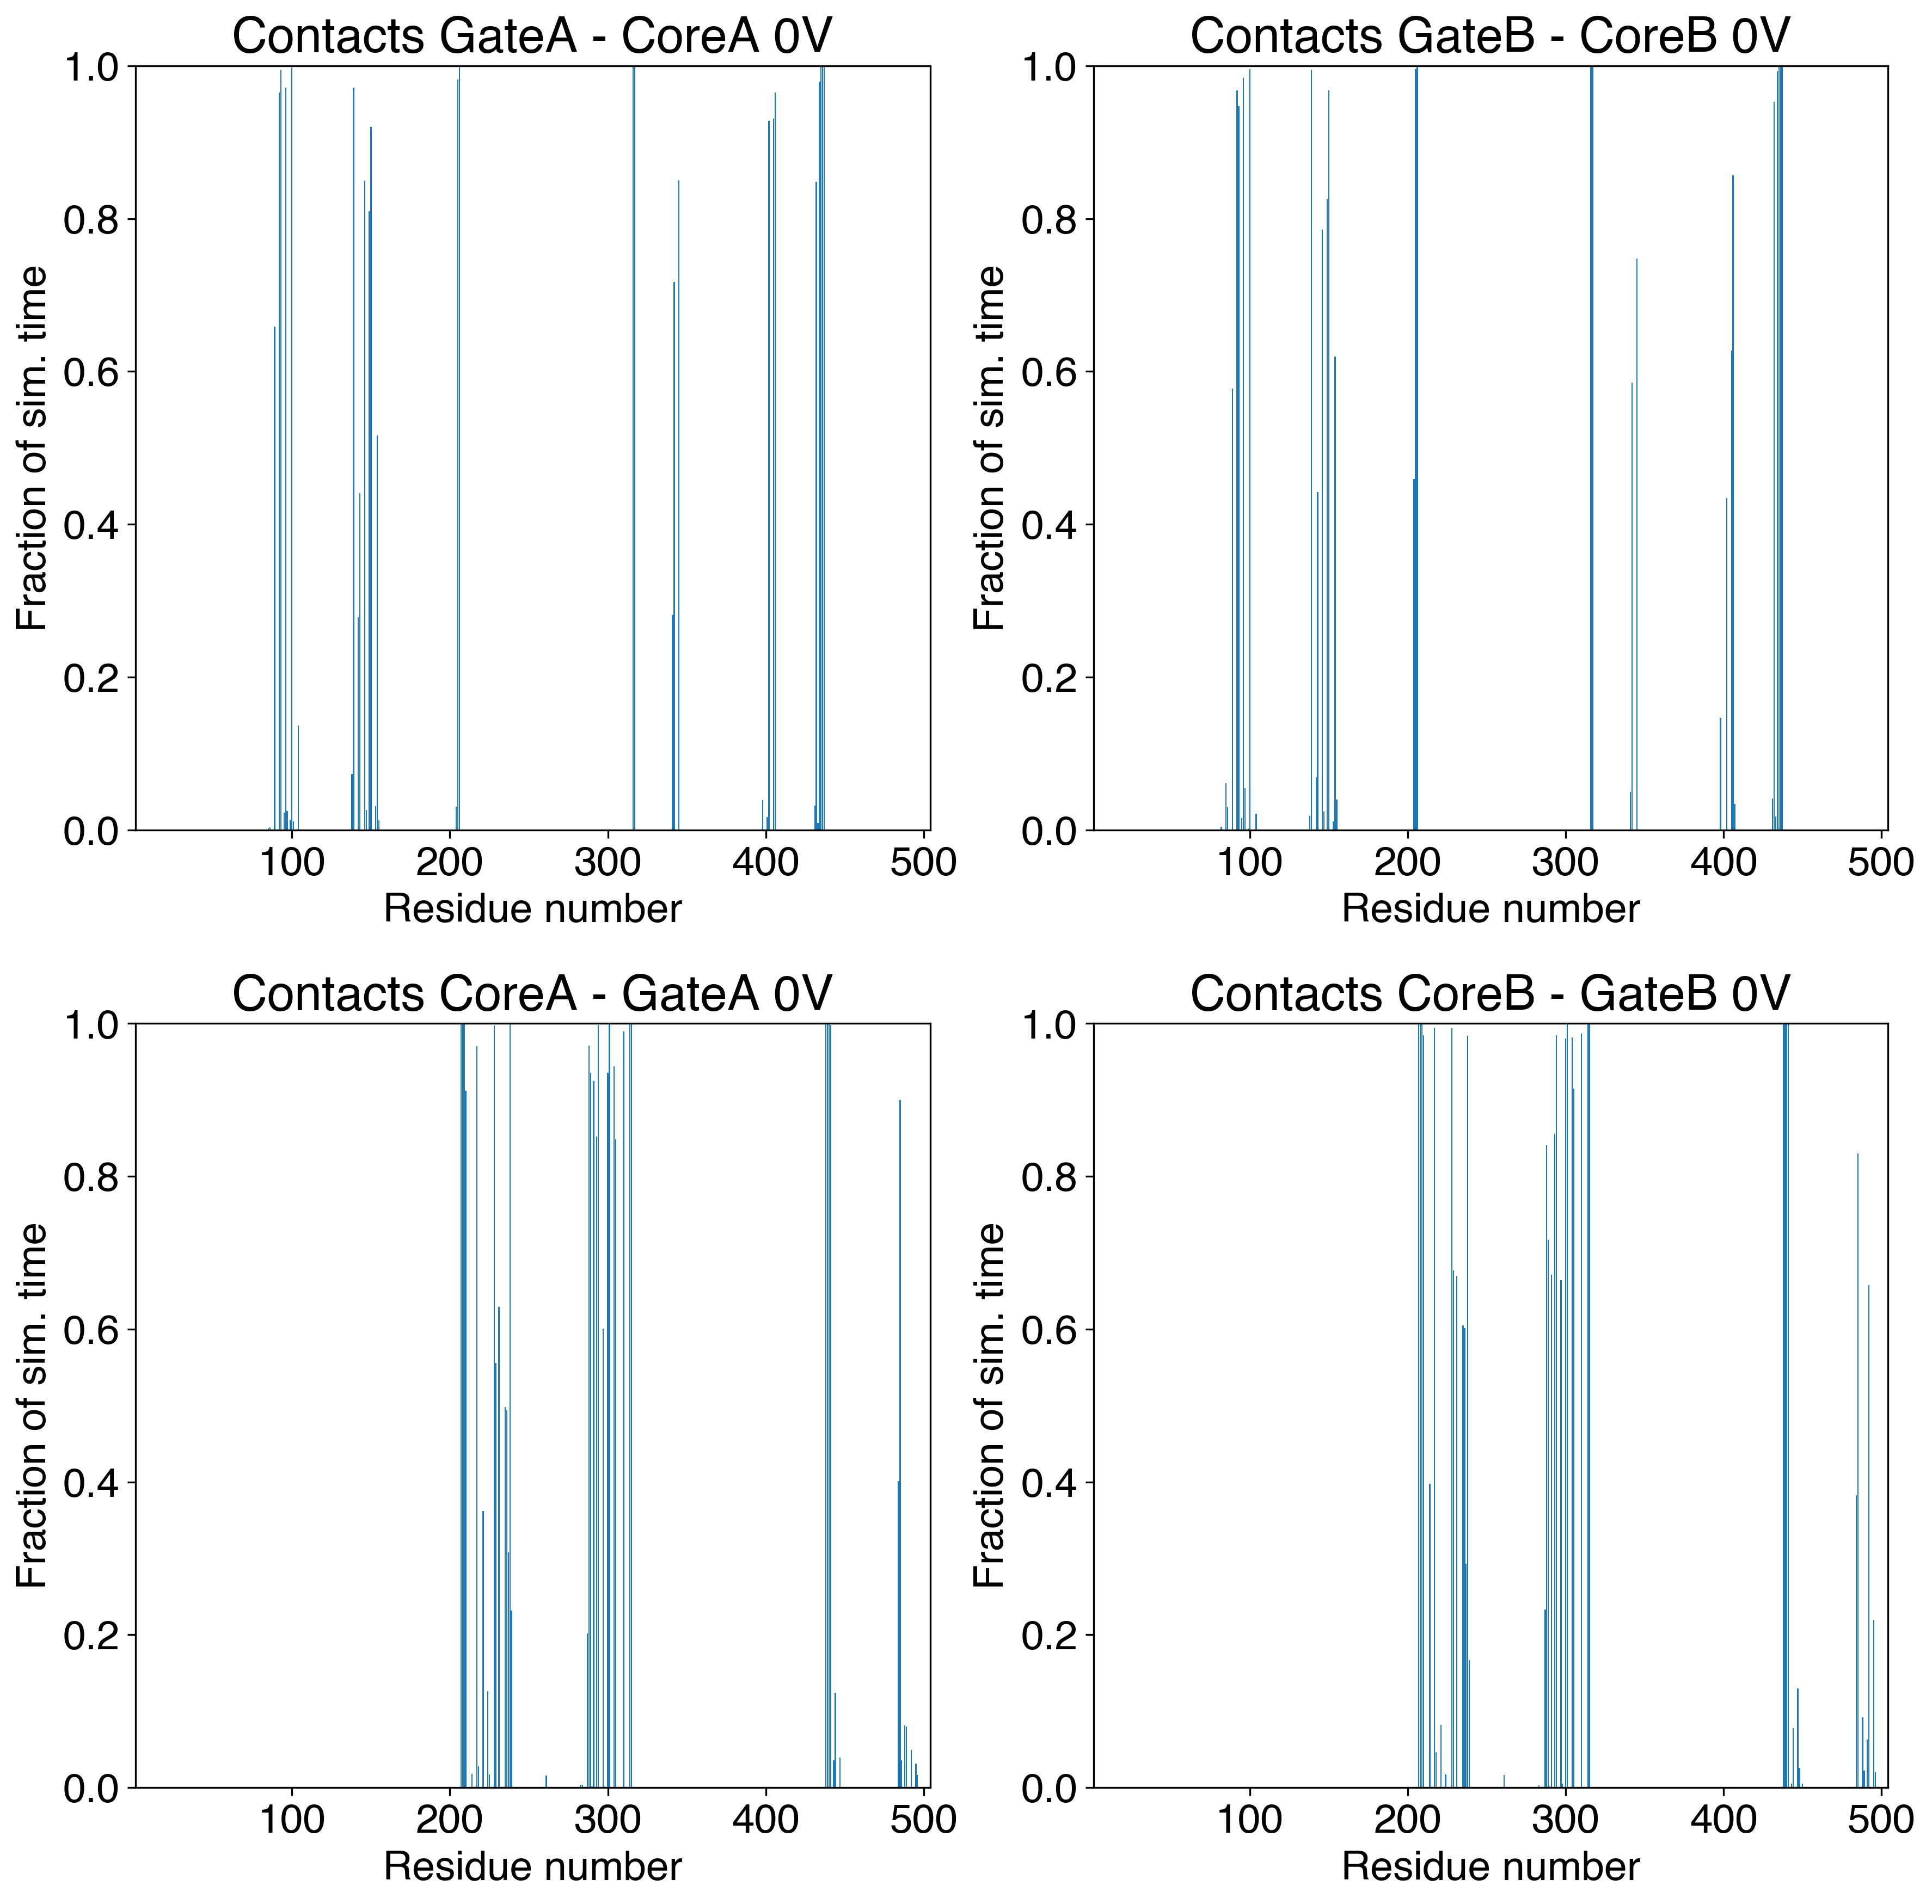

In [22]:
plt.figure( figsize = (12,12)) 

plt.subplot(221)
with open(coreA_gateA_eq, 'r') as fd:
    lines1 = fd.read().split() 
    counter1 = Counter(lines1)
    items1 = sorted(counter1.items(), key=lambda x: int(x[0]))
    num_items1 = np.array(items1, dtype=int)
    plt.xlabel('Residue number')
    plt.ylabel('Fraction of sim. time')
    plt.title('Contacts GateA - CoreA 0V')
    plt.bar((num_items1[:,0]), (num_items1[:,1]/49668))
    plt.ylim([0, 1])
    plt.xlim([1, 504])

plt.subplot(222)
with open(coreB_gateB_eq, 'r') as fd:
    lines1 = fd.read().split() 
    counter1 = Counter(lines1)
    items1 = sorted(counter1.items(), key=lambda x: int(x[0]))
    num_items1 = np.array(items1, dtype=int)
    plt.xlabel('Residue number')
    plt.ylabel('Fraction of sim. time')
    plt.title('Contacts GateB - CoreB 0V')
    plt.bar((num_items1[:,0]), (num_items1[:,1]/49668))
    plt.ylim([0, 1])
    #plt.xticks(np.arange(0, 500, 100))
    plt.xlim([1, 504])


plt.subplot(223)
with open(gateA_coreA_eq, 'r') as fd:
    lines1 = fd.read().split() 
    counter1 = Counter(lines1)
    items1 = sorted(counter1.items(), key=lambda x: int(x[0]))
    num_items1 = np.array(items1, dtype=int)
    plt.xlabel('Residue number')
    plt.ylabel('Fraction of sim. time')
    plt.title('Contacts CoreA - GateA 0V')
    plt.bar((num_items1[:,0]), (num_items1[:,1]/49668))
    plt.ylim([0, 1])
    plt.xlim([1, 504])    

plt.subplot(224)
with open(gateB_coreB_eq, 'r') as fd:
    lines1 = fd.read().split() 
    counter1 = Counter(lines1)
    items1 = sorted(counter1.items(), key=lambda x: int(x[0]))
    num_items1 = np.array(items1, dtype=int)
    plt.xlabel('Residue number')
    plt.ylabel('Fraction of sim. time')
    plt.title('Contacts CoreB - GateB 0V')
    plt.bar((num_items1[:,0]), (num_items1[:,1]/49668))
    plt.ylim([0, 1])
    plt.xlim([1, 504])


plt.tight_layout()  
#plt.savefig("/Users/capitank/Library/CloudStorage/Dropbox/USS_Lab/Investigacion/Prestin/Prestin_2023/MD_AA/hsPres_AF2_ebi/results/hPres_AF2ebi_Cloccup.pdf", dpi=300)
plt.show()